 # **Fake News Prediction**

### Importing Libraries

In [2]:
import numpy as np
import pandas as pd

### Loading the data

In [3]:
df = pd.read_csv("Liar_Dataset.csv")

### EDA

In [4]:
df.head(5)

,[ID].json,label,statement,subject(s),speaker,speaker's job title,state info,party affiliation,barely true counts,false counts,half true counts,mostly true counts,pants on fire counts,venue
0,11972.json,TRUE,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30,30,42,23,18,Radio interview
1,11685.json,FALSE,Wisconsin is on pace to double the number of l...,jobs,katrina-shankland,State representative,Wisconsin,democrat,2,1,0,0,0,a news conference
2,11096.json,FALSE,Says John McCain has done nothing to help the ...,"military,veterans,voting-record",donald-trump,President-Elect,New York,republican,63,114,51,37,61,comments on ABC's This Week.
3,5209.json,half-true,Suzanne Bonamici supports a plan that will cut...,"medicare,message-machine-2012,campaign-adverti...",rob-cornilles,consultant,Oregon,republican,1,1,3,1,1,a radio show
4,9524.json,pants-fire,When asked by a reporter whether hes at the ce...,"campaign-finance,legal-issues,campaign-adverti...",state-democratic-party-wisconsin,NaN,Wisconsin,democrat,5,7,2,2,7,a web video


In [5]:
# Deletinmg the [ID].json coloumn because its just a name of file so not useful
df.drop(['[ID].json'], axis=1, inplace=True)

In [6]:
# Coloumns/features in data
df.columns

Index(['label', 'statement', 'subject(s)', 'speaker', 'speaker's job title',
       'state info', 'party affiliation', 'barely true counts', 'false counts',
       'half true counts', 'mostly true counts', 'pants on fire counts',
       'venue'],
      dtype='object')

In [7]:
# Shape of data
df.shape

(12787, 13)

In [8]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12787 entries, 0 to 12786
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   label                 12787 non-null  object
 1   statement             12787 non-null  object
 2   subject(s)            12787 non-null  object
 3   speaker               12787 non-null  object
 4   speaker's job title   9221 non-null   object
 5   state info            10038 non-null  object
 6   party affiliation     12787 non-null  object
 7   barely true counts    12787 non-null  int64 
 8   false counts          12787 non-null  int64 
 9   half true counts      12787 non-null  int64 
 10  mostly true counts    12787 non-null  int64 
 11  pants on fire counts  12787 non-null  int64 
 12  venue                 12658 non-null  object
dtypes: int64(5), object(8)
memory usage: 1.3+ MB


In [9]:
# Data types of all coloumns
df.dtypes

label                   object
statement               object
subject(s)              object
speaker                 object
speaker's job title     object
state info              object
party affiliation       object
barely true counts       int64
false counts             int64
half true counts         int64
mostly true counts       int64
pants on fire counts     int64
venue                   object
dtype: object

In [10]:
# Checking Null values
np.sum(df.isnull().any(axis=1))

4354

In [11]:
print('No. of columns in the data is:  ', len(df.columns))

No. of columns in the data is:   13


In [12]:
print('No. of rows in the data is:  ', len(df))

No. of rows in the data is:   12787


In [13]:
# Checking duplicate data
current=len(df)
print('Rows of data before Delecting ', current)

df=df.drop_duplicates()

now=len(df)
print('Rows of data before Delecting ', now)

diff=current-now
print('Duplicated rows are ', diff)

Rows of data before Delecting  12787
Rows of data before Delecting  12786
Duplicated rows are  1


In [14]:
# Checking Null values
df.isnull().sum()

label                      0
statement                  0
subject(s)                 0
speaker                    0
speaker's job title     3566
state info              2749
party affiliation          0
barely true counts         0
false counts               0
half true counts           0
mostly true counts         0
pants on fire counts       0
venue                    129
dtype: int64

In [15]:
# Replacing NaN values to missing values
df.replace('', np.nan, inplace=True)

In [16]:
# Replacing unknown to missing values
df['venue']= df['venue'].replace(np.nan, 'Unknown')
df["speaker's job title"]= df["speaker's job title"].replace(np.nan, 'Unknown')
df["state info"]= df["state info"].replace(np.nan, 'Unknown')

In [17]:
# Checking Null values again
df.isnull().sum()

label                   0
statement               0
subject(s)              0
speaker                 0
speaker's job title     0
state info              0
party affiliation       0
barely true counts      0
false counts            0
half true counts        0
mostly true counts      0
pants on fire counts    0
venue                   0
dtype: int64

In [18]:
# Preparing the list of news types columns that are in numeric data types
num_cols = ['barely true counts', 'false counts', 'half true counts', 'mostly true counts', 'pants on fire counts']
num_cols

['barely true counts',
 'false counts',
 'half true counts',
 'mostly true counts',
 'pants on fire counts']

In [19]:
# Preparing list of the categorical columns
cate_cols = df.columns.drop('label').drop(num_cols)
cate_cols

Index(['statement', 'subject(s)', 'speaker', 'speaker's job title',
       'state info', 'party affiliation', 'venue'],
      dtype='object')

In [20]:
# Checking the number of unique values of each categorical column
df[cate_cols].apply(lambda x: x.nunique(), axis=0)

statement              12761
subject(s)              4534
speaker                 3308
speaker's job title     1354
state info                84
party affiliation         24
venue                   5142
dtype: int64

### Column-wise Data Preparation

#### 1. Labels

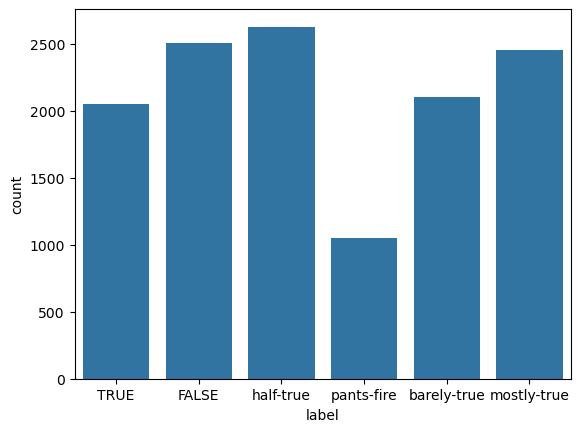

In [21]:
# Distribution of fake news labels
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data= df, x = "label")
plt.show()

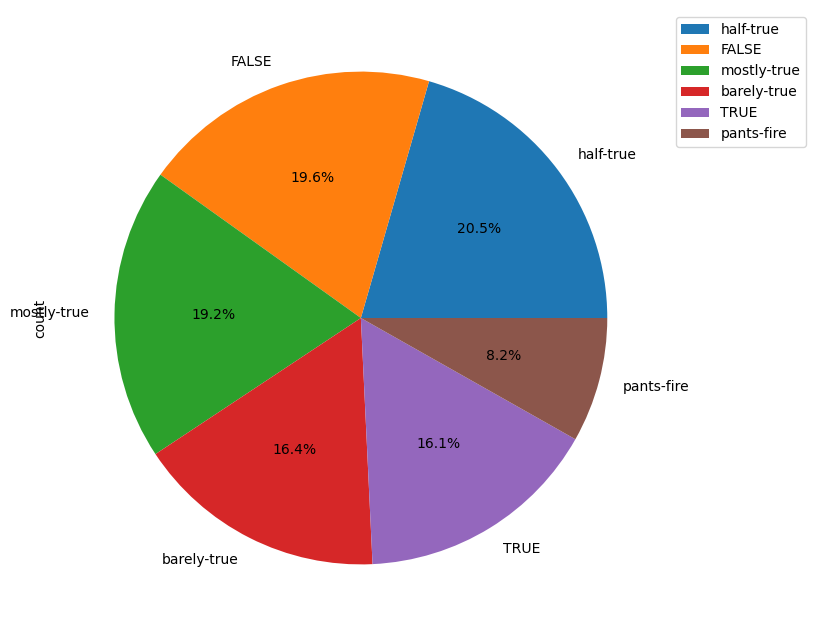

In [22]:
df["label"].value_counts().head(7).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend(bbox_to_anchor=(1, 1))

In [23]:
df["label"].value_counts()

label
half-true      2626
FALSE          2504
mostly-true    2454
barely-true    2102
TRUE           2053
pants-fire     1047
Name: count, dtype: int64

#### 2. Statement

In [24]:
# Making statement text in lower case
df['statement']=df['statement'].str.lower()

In [25]:
df['statement'].head()

0    building a wall on the u.s.-mexico border will...
1    wisconsin is on pace to double the number of l...
2    says john mccain has done nothing to help the ...
3    suzanne bonamici supports a plan that will cut...
4    when asked by a reporter whether hes at the ce...
Name: statement, dtype: object

In [26]:
# Cleaning and removing Stop words of english
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stopwords_list = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [28]:
# Cleaning and removing the above stop words list from the statement of news

STOPWORDS = set(stopwords.words('english'))
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
df["statement"] = df["statement"].apply(lambda text: cleaning_stopwords(text))
df["statement"].tail()

12782    first time decade, imports accounted less half...
12783    says donald trump bankrupted companies once, t...
12784    john mccain george bush "absolutely plan unive...
12785    new poll shows 62 percent support president's ...
12786    one claims report vindicating new jersey gov. ...
Name: statement, dtype: object

In [29]:
# Cleaning and removing punctuations

import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

In [30]:
df["statement"] = df["statement"].apply(lambda x: cleaning_punctuations(x))
df["statement"].tail()

12782    first time decade imports accounted less half ...
12783    says donald trump bankrupted companies once tw...
12784    john mccain george bush absolutely plan univer...
12785    new poll shows 62 percent support presidents p...
12786    one claims report vindicating new jersey gov c...
Name: statement, dtype: object

In [31]:
# Cleaning and removing repeating characters

def cleaning_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)

In [32]:
import re
df["statement"] = df["statement"].apply(lambda x: cleaning_repeating_char(x))
df["statement"].tail()

12782    first time decade imports acounted les half th...
12783    says donald trump bankrupted companies once tw...
12784    john mcain george bush absolutely plan univers...
12785    new pol shows 62 percent suport presidents pla...
12786    one claims report vindicating new jersey gov c...
Name: statement, dtype: object

In [33]:
# Cleaning and removing email
def cleaning_email(data):
    return re.sub('@[^\s]+', ' ', data)

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
C:\Users\hp\AppData\Local\Temp\ipykernel_10228\2553998544.py:3: SyntaxWarning: invalid escape sequence '\s'
  return re.sub('@[^\s]+', ' ', data)


In [34]:
df["statement"] = df["statement"].apply(lambda x: cleaning_email(x))
df["statement"].tail()

12782    first time decade imports acounted les half th...
12783    says donald trump bankrupted companies once tw...
12784    john mcain george bush absolutely plan univers...
12785    new pol shows 62 percent suport presidents pla...
12786    one claims report vindicating new jersey gov c...
Name: statement, dtype: object

In [35]:
# Cleaning and removing URL's
def cleaning_URLs(data):
    return re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',data)

<>:3: SyntaxWarning: invalid escape sequence '\.'
<>:3: SyntaxWarning: invalid escape sequence '\.'
C:\Users\hp\AppData\Local\Temp\ipykernel_10228\1673331271.py:3: SyntaxWarning: invalid escape sequence '\.'
  return re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',data)


In [36]:
df["statement"] = df["statement"].apply(lambda x: cleaning_URLs(x))
df["statement"].tail()

12782    first time decade imports acounted les half th...
12783    says donald trump bankrupted companies once tw...
12784    john mcain george bush absolutely plan univers...
12785    new pol shows 62 percent suport presidents pla...
12786    one claims report vindicating new jersey gov c...
Name: statement, dtype: object

In [37]:
# Cleaning and removing Numeric numbers
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)

In [38]:
df["statement"] = df["statement"].apply(lambda x: cleaning_numbers(x))
df["statement"].tail()

12782    first time decade imports acounted les half th...
12783    says donald trump bankrupted companies once tw...
12784    john mcain george bush absolutely plan univers...
12785    new pol shows  percent suport presidents plan ...
12786    one claims report vindicating new jersey gov c...
Name: statement, dtype: object

In [39]:
# Getting tokenization of news statement text

from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
df["statement"] = df["statement"].apply(tokenizer.tokenize)

In [40]:
df["statement"].head()

0    [building, wal, usmexico, border, take, litera...
1      [wisconsin, pace, double, number, layofs, year]
2       [says, john, mcain, done, nothing, help, vets]
3    [suzane, bonamici, suports, plan, cut, choice,...
4    [asked, reporter, whether, hes, center, crimin...
Name: statement, dtype: object

In [41]:
# Applying Stemming

st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data

df["statement"] = df["statement"].apply(lambda x: stemming_on_text(x))

In [42]:
df["statement"].head()

0    [building, wal, usmexico, border, take, litera...
1      [wisconsin, pace, double, number, layofs, year]
2       [says, john, mcain, done, nothing, help, vets]
3    [suzane, bonamici, suports, plan, cut, choice,...
4    [asked, reporter, whether, hes, center, crimin...
Name: statement, dtype: object

In [43]:
# Applying Lemmatizer

import nltk
nltk.download('wordnet')

lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data

df["statement"] = df["statement"].apply(lambda x: lemmatizer_on_text(x))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [44]:
df["statement"].head()

0    [building, wal, usmexico, border, take, litera...
1      [wisconsin, pace, double, number, layofs, year]
2       [says, john, mcain, done, nothing, help, vets]
3    [suzane, bonamici, suports, plan, cut, choice,...
4    [asked, reporter, whether, hes, center, crimin...
Name: statement, dtype: object

In [45]:
# Looking at the details of the news statement text

words = [word for tokens in df["statement"] for word in tokens]
lenght_of_each_sentence = [len(tokens) for tokens in df["statement"]]
vocabulary  = sorted(list(set(words)))
print("There are %s words in total, with vocabulary size of %s" % (len(words), len(vocabulary)))

There are 136875 words in total, with vocabulary size of 13710


In [46]:
#  Top 25 frequently words in news statement text
from collections import Counter
counts_of_words = Counter(words)

In [47]:
counts_of_words.most_common(25)

[('says', 2978),
 ('percent', 1501),
 ('state', 1014),
 ('obama', 878),
 ('tax', 826),
 ('health', 776),
 ('years', 765),
 ('president', 739),
 ('people', 735),
 ('year', 708),
 ('states', 676),
 ('milion', 674),
 ('would', 664),
 ('care', 655),
 ('us', 636),
 ('jobs', 611),
 ('new', 599),
 ('one', 576),
 ('bil', 503),
 ('bilion', 499),
 ('texas', 484),
 ('federal', 476),
 ('said', 463),
 ('every', 463),
 ('barack', 453)]

<BarContainer object of 25 artists>

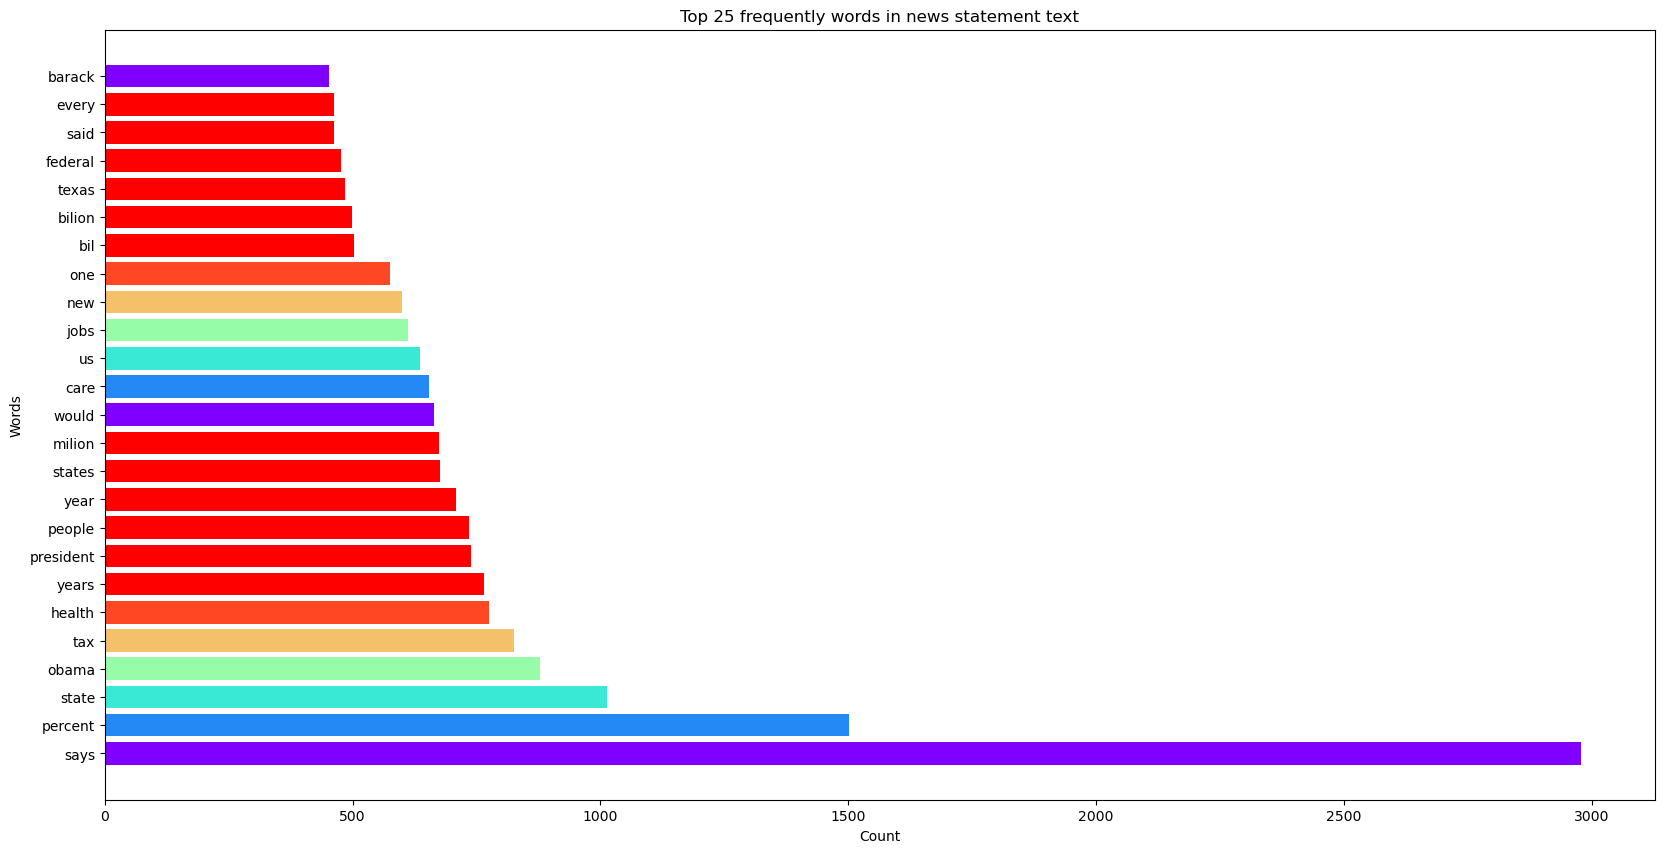

In [48]:
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

words = []
counts = []
for letter, count in counts_of_words.most_common(25):
    words.append(letter)
    counts.append(count)
colors = cm.rainbow(np.linspace(0, 2, 12))
rcParams['figure.figsize'] = 20, 10
plt.title('Top 25 frequently words in news statement text')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)

#### 3. Subject

In [49]:
df["subject(s)"].head()

0                                          immigration
1                                                 jobs
2                      military,veterans,voting-record
3    medicare,message-machine-2012,campaign-adverti...
4    campaign-finance,legal-issues,campaign-adverti...
Name: subject(s), dtype: object

In [50]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')

df["subject(s)"]= df["subject(s)"].str.replace(",", " ")
subjectTokenize = []
for sen in df["subject(s)"]:
    subjectTokenize.append(word_tokenize(sen))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [51]:
# Removing the stop words from subject(s)

filteredsubjects = []
for words in subjectTokenize:
    stopWords = set(stopwords.words('english'))
    wordsFiltered = []
    for w in words:
        if w not in stopWords:
            wordsFiltered.append(w)
    filteredsubjects.append(wordsFiltered)


In [52]:
# Applying stemming

from nltk.stem import PorterStemmer

ps = PorterStemmer()
index = 0
for words in filteredsubjects:
    subjects=""
    for w in words:
        subjects=subjects+ps.stem(w)+" "
    df.at[index, "subject(s)"] = subjects
    index += 1

In [53]:
# Replacing the different words with field related

df["dummp"]=df["subject(s)"]
df["dummp"]=df["dummp"].str.strip()
df.loc[df["dummp"].str.contains('job|worker'), 'dummp'] = 'jobs'
df.loc[df["dummp"].str.contains('hous'), 'dummp'] = 'budget'
df.loc[df["dummp"].str.contains('county-budget'), 'dummp'] = 'budget'
df.loc[df["dummp"].str.contains('federal-budget'), 'dummp'] = 'budget'
df.loc[df["dummp"].str.contains('state-budget|city-budget'), 'dummp'] = 'budget'
df.loc[df["dummp"].str.contains('state-fin'), 'dummp'] = 'budget'
df.loc[df["dummp"].str.contains('edu'), 'dummp'] = 'education'
df.loc[df["dummp"].str.contains('economi|incom|tax|debt|market-regul|financial-regul|trade|small-busi'), 'dummp'] = 'economy'
df.loc[df["dummp"].str.contains('militari|veteran'), 'dummp'] = 'military'
df.loc[df["dummp"].str.contains('government-effici|city-govern|county-govern|government-regul|supreme-court|state'), 'dummp'] = 'government'

df.loc[df["dummp"].str.contains('health-car|medicar|abort|public-health'), 'dummp'] = 'health-care'
df.loc[df["dummp"].str.contains('crime|gun|public-safeti|legal-issu|terror|homeland-secur'), 'dummp'] = 'crime'

df.loc[df["dummp"].str.contains('climate-chang|environ|anim'), 'dummp'] = 'environment'

df.loc[df["dummp"].str.contains('foreign-polici|voting-record|congress|elect|politics'), 'dummp'] = 'politics'

df.loc[df["dummp"].str.contains('children|immigr|women|popul|poverti|social-secur|religion'), 'dummp'] = 'social'


In [54]:
df.loc[~df["dummp"].str.contains('jobs|budget|education|economy|military|government|health-care|crime|environment|politics|social'), 'dummp'] = 'other'

In [55]:
df["dummp"].value_counts()

dummp
budget         1910
other          1836
economy        1689
jobs           1418
health-care    1333
crime          1188
politics        971
social          654
education       629
government      473
military        350
environment     336
Name: count, dtype: int64

In [56]:
df["subject(s)"]=df["dummp"]

In [57]:
df["subject(s)"].value_counts()

subject(s)
budget         1910
other          1836
economy        1689
jobs           1418
health-care    1333
crime          1188
politics        971
social          654
education       629
government      473
military        350
environment     336
Name: count, dtype: int64

In [58]:
df=df.drop(columns=['dummp'])

In [59]:
jt=[]
jt=df["subject(s)"].unique()
for i in jt:
    print(i)

social
jobs
military
health-care
crime
budget
economy
other
politics
environment
government
education


<Axes: xlabel='subject(s)'>

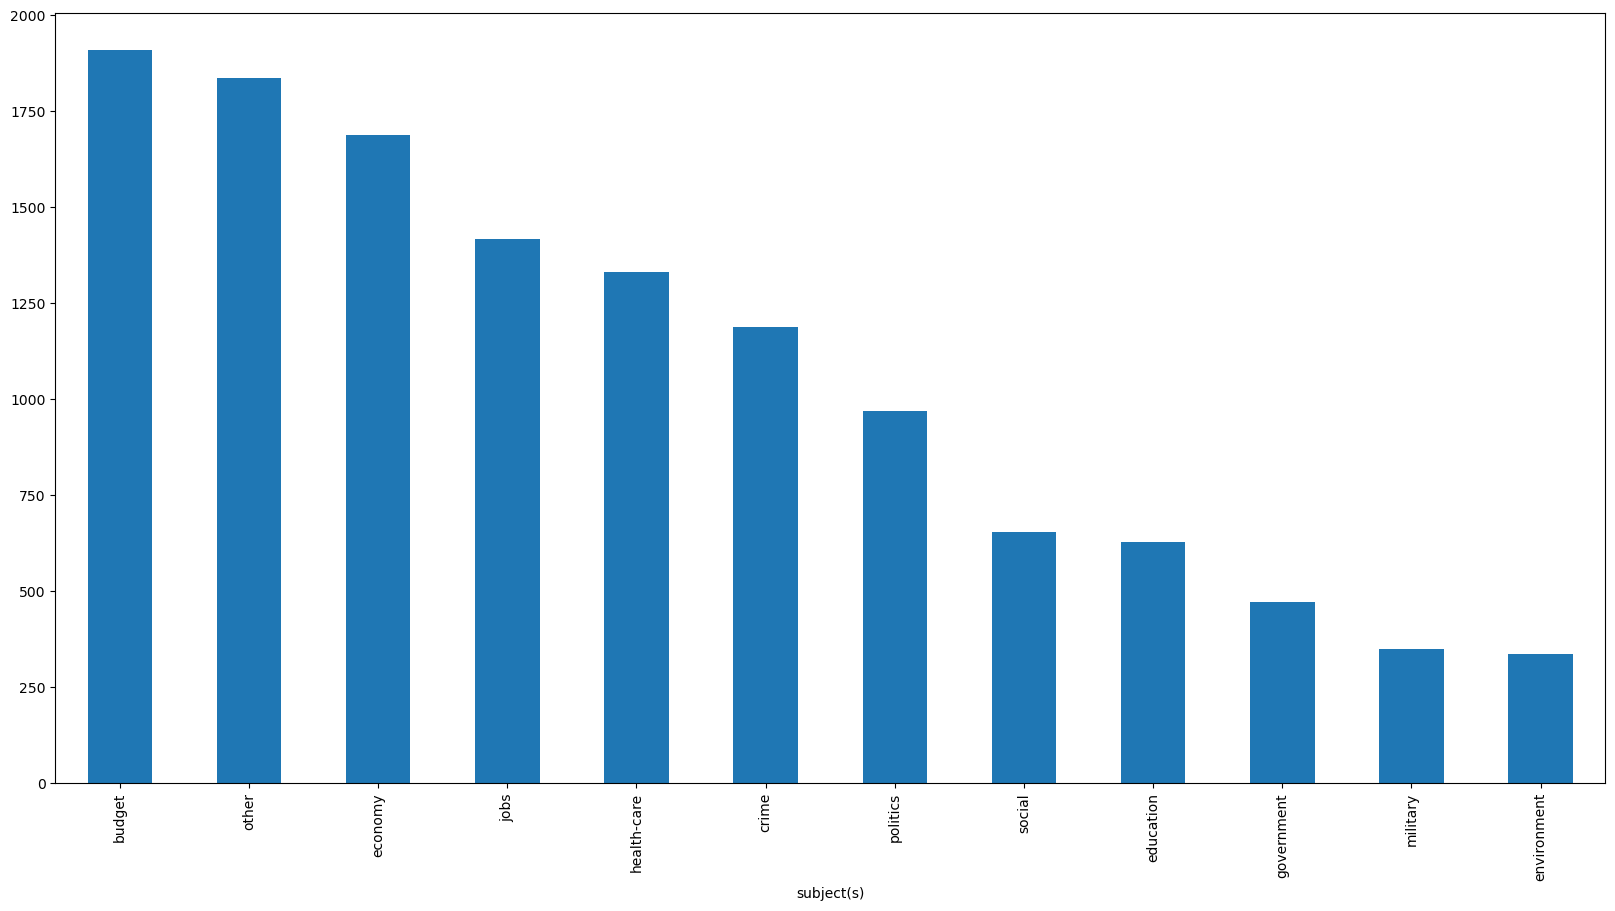

In [60]:
# Count of the Subjects now !
df["subject(s)"].value_counts().head(12).plot(kind='bar')

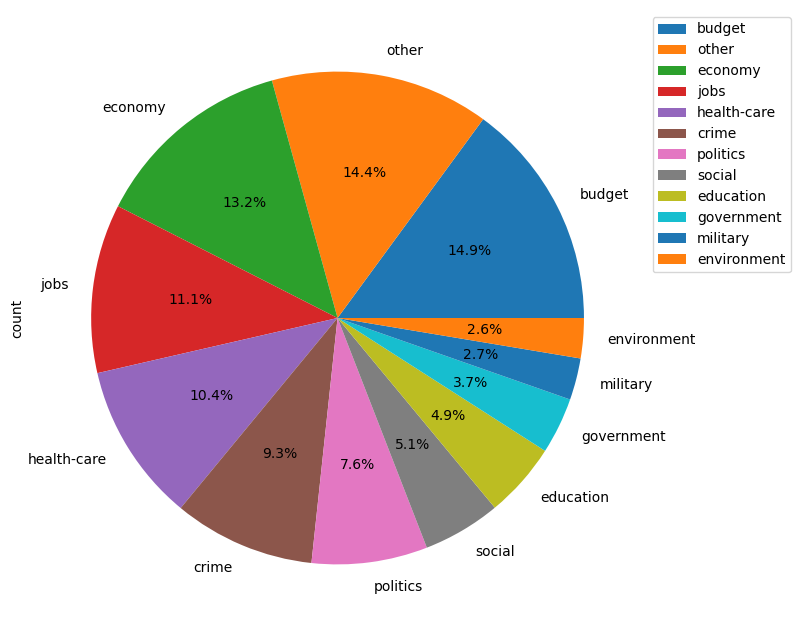

In [61]:
df["subject(s)"].value_counts().head(12).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend(bbox_to_anchor=(1, 1))

#### 4. Speaker

In [62]:
df["speaker"].head()

0                          rick-perry
1                   katrina-shankland
2                        donald-trump
3                       rob-cornilles
4    state-democratic-party-wisconsin
Name: speaker, dtype: object

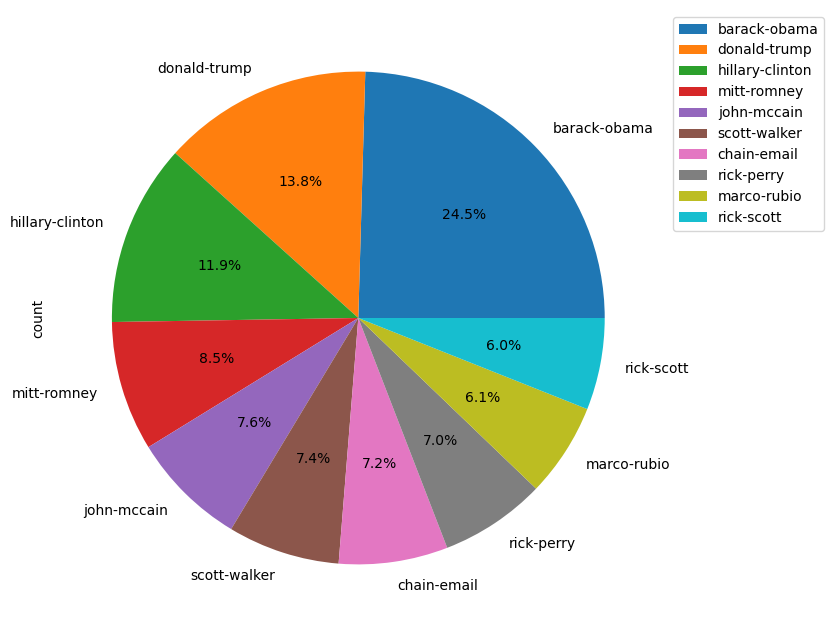

In [63]:
# Top 10 speakers

df["speaker"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend(bbox_to_anchor=(1, 1))

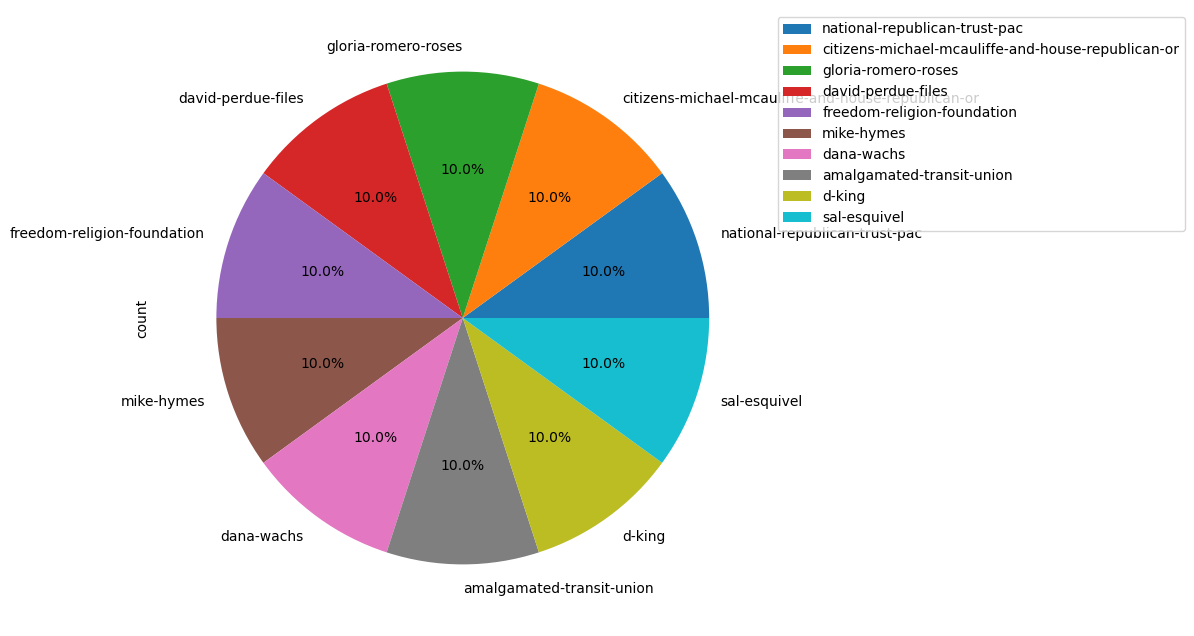

In [64]:
# Least 10 speakers
df["speaker"].value_counts().tail(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend(bbox_to_anchor=(1, 1))

In [65]:
# Counts of speakers that are come in top 50
df["speaker"].value_counts().head(50)

speaker
barack-obama                                   611
donald-trump                                   343
hillary-clinton                                297
mitt-romney                                    212
john-mccain                                    189
scott-walker                                   183
chain-email                                    178
rick-perry                                     173
marco-rubio                                    153
rick-scott                                     150
ted-cruz                                       118
bernie-s                                       106
chris-christie                                 104
facebook-posts                                 100
charlie-crist                                   90
newt-gingrich                                   83
blog-posting                                    81
jeb-bush                                        79
joe-biden                                       76
paul-ryan              

### 5. speaker's job title

In [66]:
df["speaker's job title"] .head()

0                Governor
1    State representative
2         President-Elect
3              consultant
4                 Unknown
Name: speaker's job title, dtype: object

In [67]:
# Tokenization on speaker's job title colomn

df["speaker's job title"] = df["speaker's job title"].apply(str)
jobTokenize = []
for sen in df["speaker's job title"]:
    jobTokenize.append(word_tokenize(sen))

In [68]:
# Removing stop words from the speaker's job title Token
from nltk.corpus import stopwords
filteredjobs = []
for words in jobTokenize:
    stopWords = set(stopwords.words('english'))
    wordsFiltered = []
    for w in words:
        if w not in stopWords:
            wordsFiltered.append(w)
    filteredjobs.append(wordsFiltered)

In [69]:
# Applying the stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()

index = 0
for words in filteredjobs:

    job=""
    for w in words:
        job=job+ps.stem(w)+" "
    df.at[index, "speaker's job title"] = job
    index += 1

In [70]:
# Replacing the different words with field related

df["dummp"]=df["speaker's job title"]
df["dummp"]=df["dummp"].str.strip()
df.loc[df["dummp"].str.contains('repres'), 'dummp'] = 'U.S. representative'
df.loc[df["dummp"].str.contains('governor'), 'dummp'] = 'state representative'
df.loc[df["dummp"].str.contains('state'), 'dummp'] = 'state representative'
df.loc[df["dummp"].str.contains('congressman'), 'dummp'] = 'state representative'
df.loc[df["dummp"].str.contains('senat'), 'speaker'] = 'state representative'
df.loc[df["dummp"].str.contains('congresswoman'), 'dummp'] = 'state representative'
df.loc[df["dummp"].str.contains('deleg'), 'dummp'] = 'state representative'
df.loc[df["dummp"].str.contains('mayor'), 'dummp'] = 'state representative'
df.loc[df["dummp"].str.contains('presid'), 'dummp'] = 'president'
df.loc[df["dummp"].str.contains('director'), 'dummp'] = 'office director'
df.loc[df["dummp"].str.contains('group'), 'dummp'] = 'company'
df.loc[df["dummp"].str.contains('chairman'), 'dummp'] = 'company'
df.loc[df["dummp"].str.contains('program'), 'dummp'] = 'company'
df.loc[df["dummp"].str.contains('counti'), 'dummp'] = 'government'
df.loc[df["dummp"].str.contains('attorney'), 'dummp'] = 'government'
df.loc[df["dummp"].str.contains('govern'), 'dummp'] = 'government'
df.loc[df["dummp"].str.contains('media'), 'dummp'] = 'media'
df.loc[df["dummp"].str.contains('blog'), 'dummp'] = 'media'
df.loc[df["dummp"].str.contains('show'), 'dummp'] = 'media'
df.loc[df["dummp"].str.contains('host'), 'dummp'] = 'media'
df.loc[df["dummp"].str.contains('radio'), 'dummp'] = 'media'
df.loc[df["dummp"].str.contains('tv'), 'dummp'] = 'media'
df.loc[df["dummp"].str.contains('unknown'), 'dummp'] = 'unknown'

In [71]:
df.loc[~df["dummp"].str.contains('state representative|president|office director|company|U.S. representative|government|media|unknown'), 'dummp'] = 'other'

In [72]:
df["dummp"].value_counts()

dummp
unknown                 3567
other                   3142
state representative    2196
president               1511
U.S. representative     1078
media                    485
government               485
company                  207
office director          116
Name: count, dtype: int64

In [73]:
df["speaker's job title"]=df["dummp"]

In [74]:
df["speaker's job title"].value_counts()

speaker's job title
unknown                 3567
other                   3142
state representative    2196
president               1511
U.S. representative     1078
media                    485
government               485
company                  207
office director          116
Name: count, dtype: int64

In [75]:
df=df.drop(columns=['dummp'])

In [76]:
jt=[]
jt=df["speaker's job title"].unique()
for i in jt:
    print(i)

state representative
U.S. representative
president
other
unknown
media
office director
government
company


<Axes: xlabel="speaker's job title">

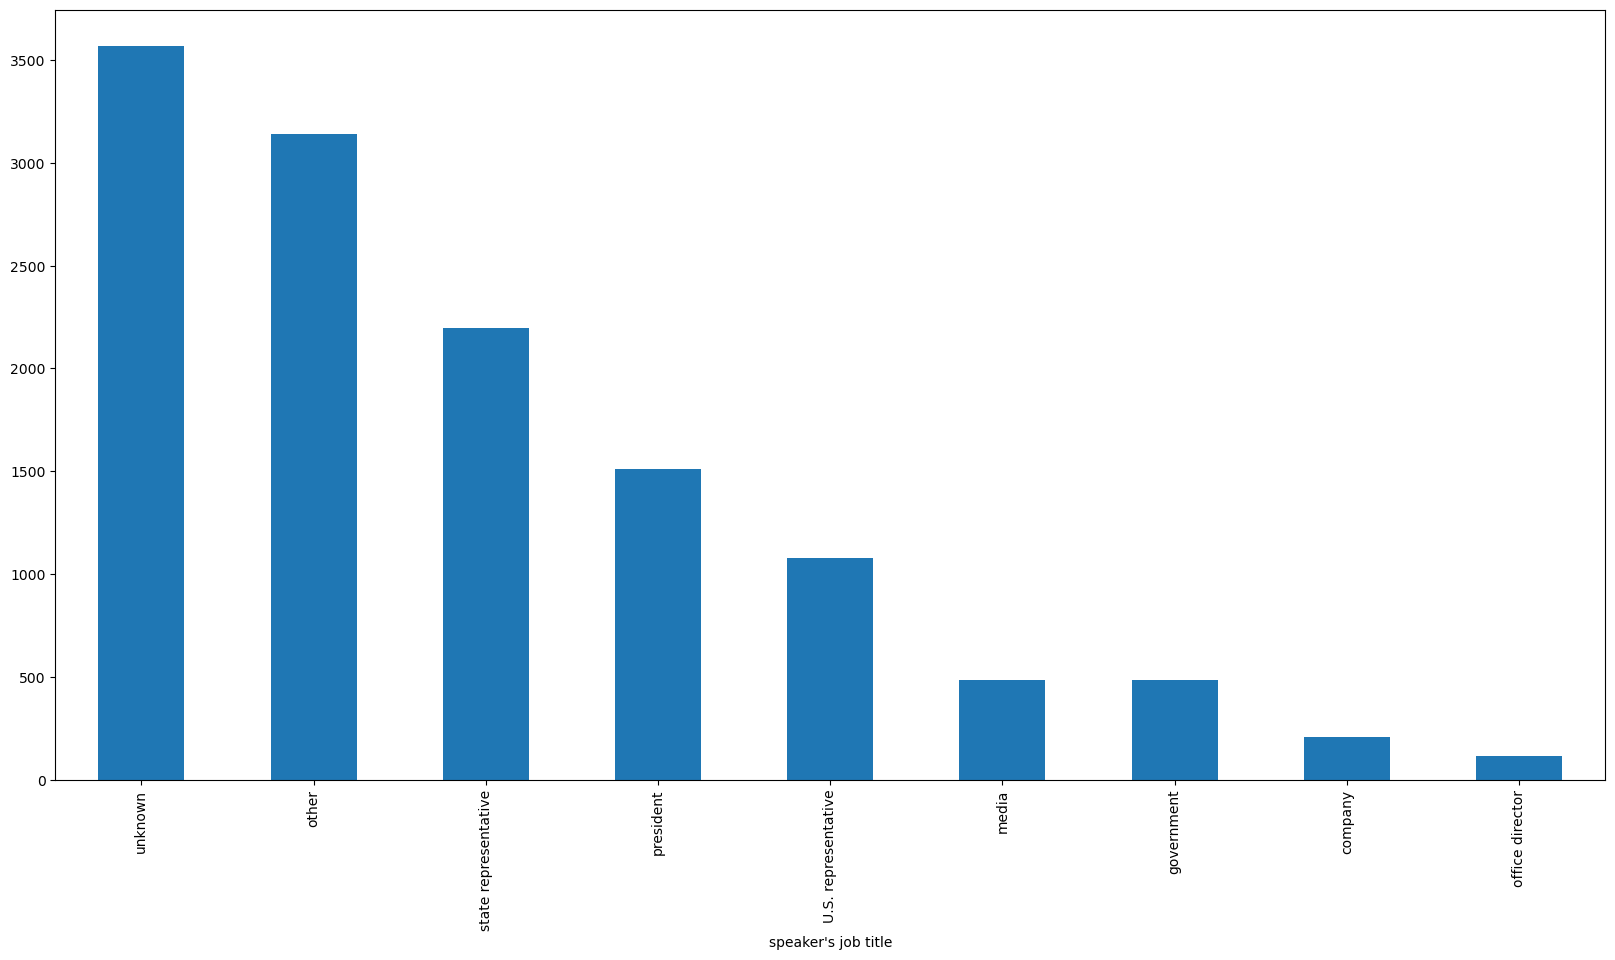

In [77]:
# Count of the speaker's job title now !
df["speaker's job title"].value_counts().head(12).plot(kind='bar')

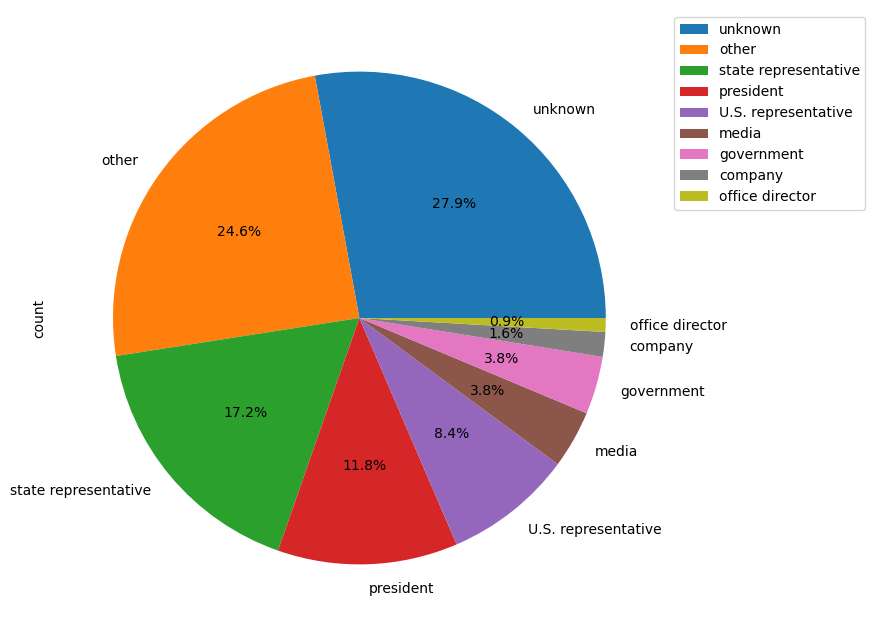

In [78]:
df["speaker's job title"].value_counts().head(12).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend(bbox_to_anchor=(1, 1))

### 6. State info

In [79]:
df["state info"].head()

0        Texas
1    Wisconsin
2     New York
3       Oregon
4    Wisconsin
Name: state info, dtype: object

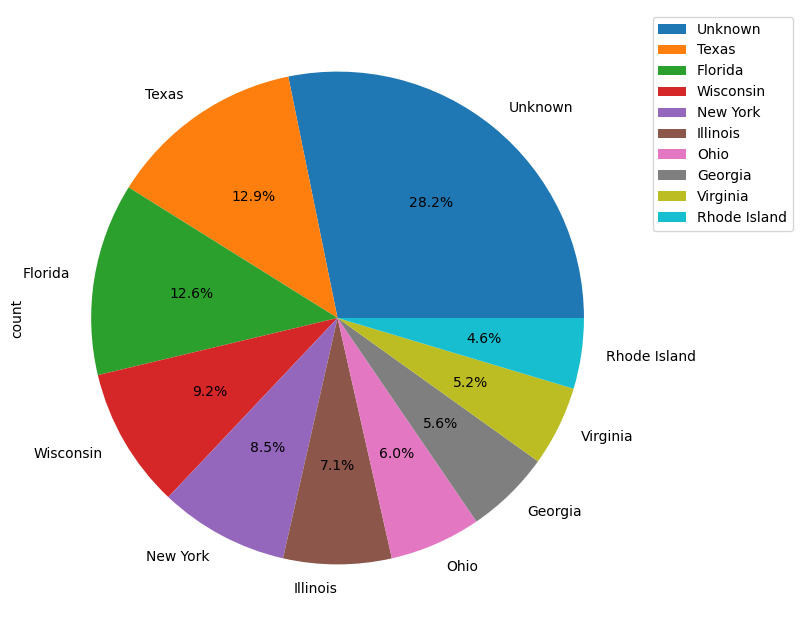

In [80]:
# Top 10 states in the data
df["state info"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend(bbox_to_anchor=(1, 1))

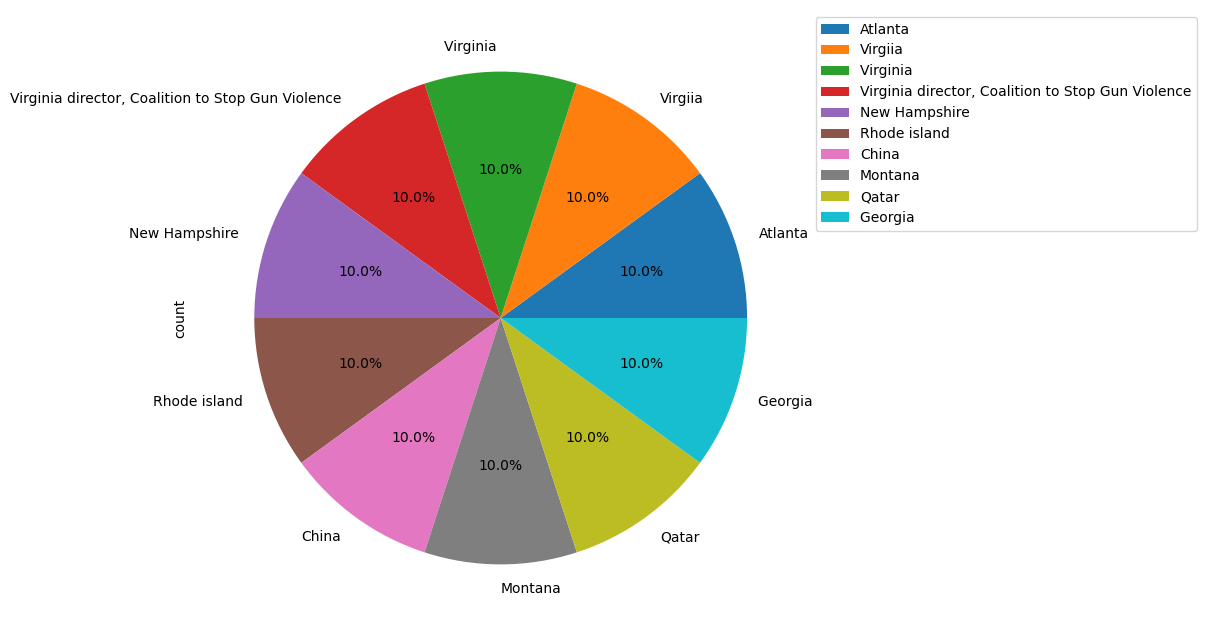

In [81]:
# Least 10 states in data
df["state info"].value_counts().tail(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend(bbox_to_anchor=(1, 1))

In [82]:
# Counts of state info that are come in top 50
df["state info"].value_counts().head(50)

state info
Unknown                 2752
Texas                   1259
Florida                 1231
Wisconsin                900
New York                 829
Illinois                 692
Ohio                     585
Georgia                  545
Virginia                 512
Rhode Island             452
Oregon                   307
New Jersey               305
Massachusetts            250
Arizona                  228
California               180
Washington, D.C.         141
Vermont                  117
Pennsylvania             112
New Hampshire            107
Arkansas                 103
Kentucky                  98
Tennessee                 88
Maryland                  86
Delaware                  84
Alaska                    81
Minnesota                 75
North Carolina            72
Nevada                    58
Indiana                   52
Missouri                  48
South Carolina            39
New Mexico                37
Louisiana                 33
Colorado                  29
Mic

In [83]:
# Preparing the part affiliation
df['party affiliation'].head()

0    republican
1      democrat
2    republican
3    republican
4      democrat
Name: party affiliation, dtype: object

In [84]:
# Unique party affiliations
party=[]
party=df['party affiliation'].unique()
for i in party:
    print(i)

republican
democrat
none
activist
organization
libertarian
journalist
independent
columnist
state-official
business-leader
talk-show-host
government-body
newsmaker
county-commissioner
constitution-party
labor-leader
education-official
tea-party-member
green
liberal-party-canada
Moderate
democratic-farmer-labor
ocean-state-tea-party-action
nan


##### Creating four party affiliation
1. republican
2. democrat
3. Unknown
4. Other

In [85]:
df["party affiliation"]= df["party affiliation"].replace('none', 'Unknown')
df["party affiliation"]= df["party affiliation"].replace('activist', 'Other')
df["party affiliation"]= df["party affiliation"].replace('organization', 'Other')
df["party affiliation"]= df["party affiliation"].replace('libertarian', 'Other')
df["party affiliation"]= df["party affiliation"].replace('journalist', 'Other')
df["party affiliation"]= df["party affiliation"].replace('columnist', 'Other')
df["party affiliation"]= df["party affiliation"].replace('state-official', 'Other')
df["party affiliation"]= df["party affiliation"].replace('business-leader', 'Other')
df["party affiliation"]= df["party affiliation"].replace('talk-show-host', 'Other')
df["party affiliation"]= df["party affiliation"].replace('government-body', 'Other')
df["party affiliation"]= df["party affiliation"].replace('newsmaker', 'Other')
df["party affiliation"]= df["party affiliation"].replace('county-commissioner', 'Other')
df["party affiliation"]= df["party affiliation"].replace('constitution-party', 'Other')
df["party affiliation"]= df["party affiliation"].replace('labor-leader', 'Other')
df["party affiliation"]= df["party affiliation"].replace('education-official', 'Other')
df["party affiliation"]= df["party affiliation"].replace('tea-party-member', 'Other')
df["party affiliation"]= df["party affiliation"].replace('green', 'Other')
df["party affiliation"]= df["party affiliation"].replace('liberal-party-canada', 'Other')
df["party affiliation"]= df["party affiliation"].replace('Moderate', 'Other')
df["party affiliation"]= df["party affiliation"].replace('democratic-farmer-labor', 'Other')
df["party affiliation"]= df["party affiliation"].replace('ocean-state-tea-party-action', 'Other')
df["party affiliation"]= df["party affiliation"].replace('independent', 'Other')

In [86]:
party=[]
party=df['party affiliation'].unique()
for i in party:
    print(i)

republican
democrat
Unknown
Other
nan


In [87]:
# Count of the party affiliation now !

def check_dist(dataset):
  sns.countplot(x='party affiliation', data=df, palette='hls')

C:\Users\hp\AppData\Local\Temp\ipykernel_10228\4200196498.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='party affiliation', data=df, palette='hls')


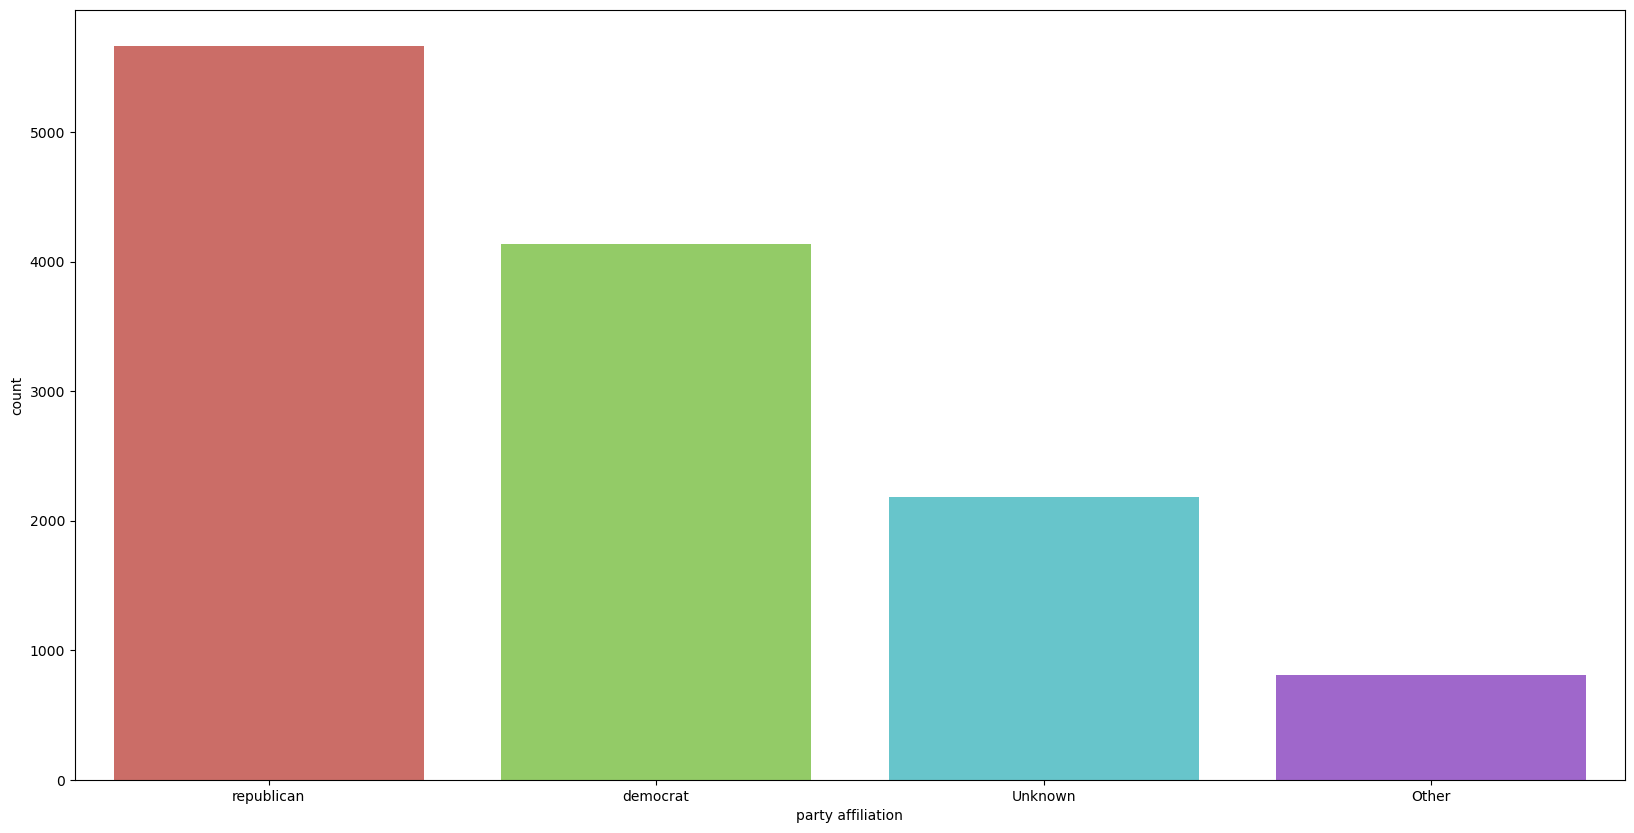

In [88]:
check_dist(df)

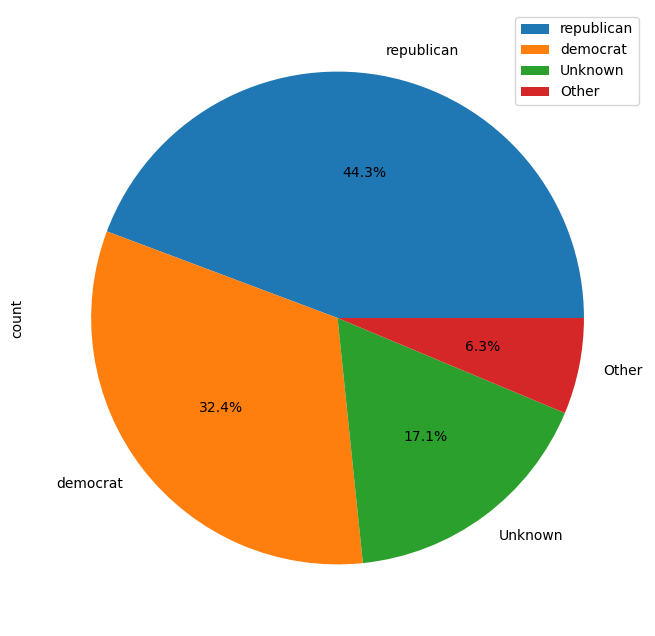

In [89]:
df["party affiliation"].value_counts().head(12).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend()

### 7. venue

In [90]:
df["venue"].head()

0                 Radio interview
1               a news conference
2    comments on ABC's This Week.
3                    a radio show
4                     a web video
Name: venue, dtype: object

In [91]:
# Applying the striping to remove spaces from venue
df["venue"] = df["venue"].apply(str)

In [92]:
# Tokenization of the venue colomn
vanueTokenize = []
for sen_tex in df['venue']:
    vanueTokenize.append(word_tokenize(sen_tex))

In [93]:
# cleaning stop words from the vanue column
filteredVenues = []
for words in vanueTokenize:
    stopWords = set(stopwords.words('english'))
    wordsFiltered = []
    for w in words:
        if w not in stopWords:
            wordsFiltered.append(w)
    filteredVenues.append(wordsFiltered)

In [94]:
# Applying stemming on venue column
ps = PorterStemmer()
index = 0
for words in filteredVenues:
    vn=""
    for w in words:
        vn=vn+ps.stem(w)+" "
    df.at[index, 'venue'] = vn
    index += 1

In [95]:
# Replacing words with their fields names
df["dummp"]=df["venue"]
df["dummp"]=df["dummp"].str.strip()
df.loc[df["dummp"].str.contains('confer|press|speech|interview|debate|broadcast|meet|opinion|statement|letter|ralli'), 'dummp'] = 'interview'
df.loc[df["dummp"].str.contains('campaign|ad|flier|commerci|mailer|panel|billboard'), 'dummp'] = 'ad'
df.loc[df["dummp"].str.contains('facebook|imag|media|meme|tweet|email|e-email|forum|blog|twitter'), 'dummp'] = 'social media'

df.loc[df["dummp"].str.contains('abc|articl|news|cnn|msnbc|book|journal|hbo|fox|column|newslett'), 'dummp'] = 'news'
df.loc[df["dummp"].str.contains('websit|web'), 'dummp'] = 'website'

df.loc[df["dummp"].str.contains('show'), 'dummp'] = 'show'

df.loc[df["dummp"].str.contains('unknown'), 'dummp'] = 'unknown'

In [96]:
df.loc[~df["dummp"].str.contains('interview|ad|social media|news|website|show|unknown'), 'dummp'] = 'other'

In [97]:
df["dummp"].value_counts()

dummp
interview       5321
other           2425
ad              2238
news            1387
social media     998
website          227
unknown          129
show              62
Name: count, dtype: int64

In [98]:
df["venue"]=df["dummp"]

In [99]:
df["venue"].value_counts()

venue
interview       5321
other           2425
ad              2238
news            1387
social media     998
website          227
unknown          129
show              62
Name: count, dtype: int64

In [100]:
df=df.drop(columns=['dummp'])

In [101]:
v=[]
v=df['venue'].unique()
for i in v:
    print(i)

interview
news
ad
website
social media
other
show
unknown


C:\Users\hp\AppData\Local\Temp\ipykernel_10228\790122970.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='venue', data=df, palette='hls')


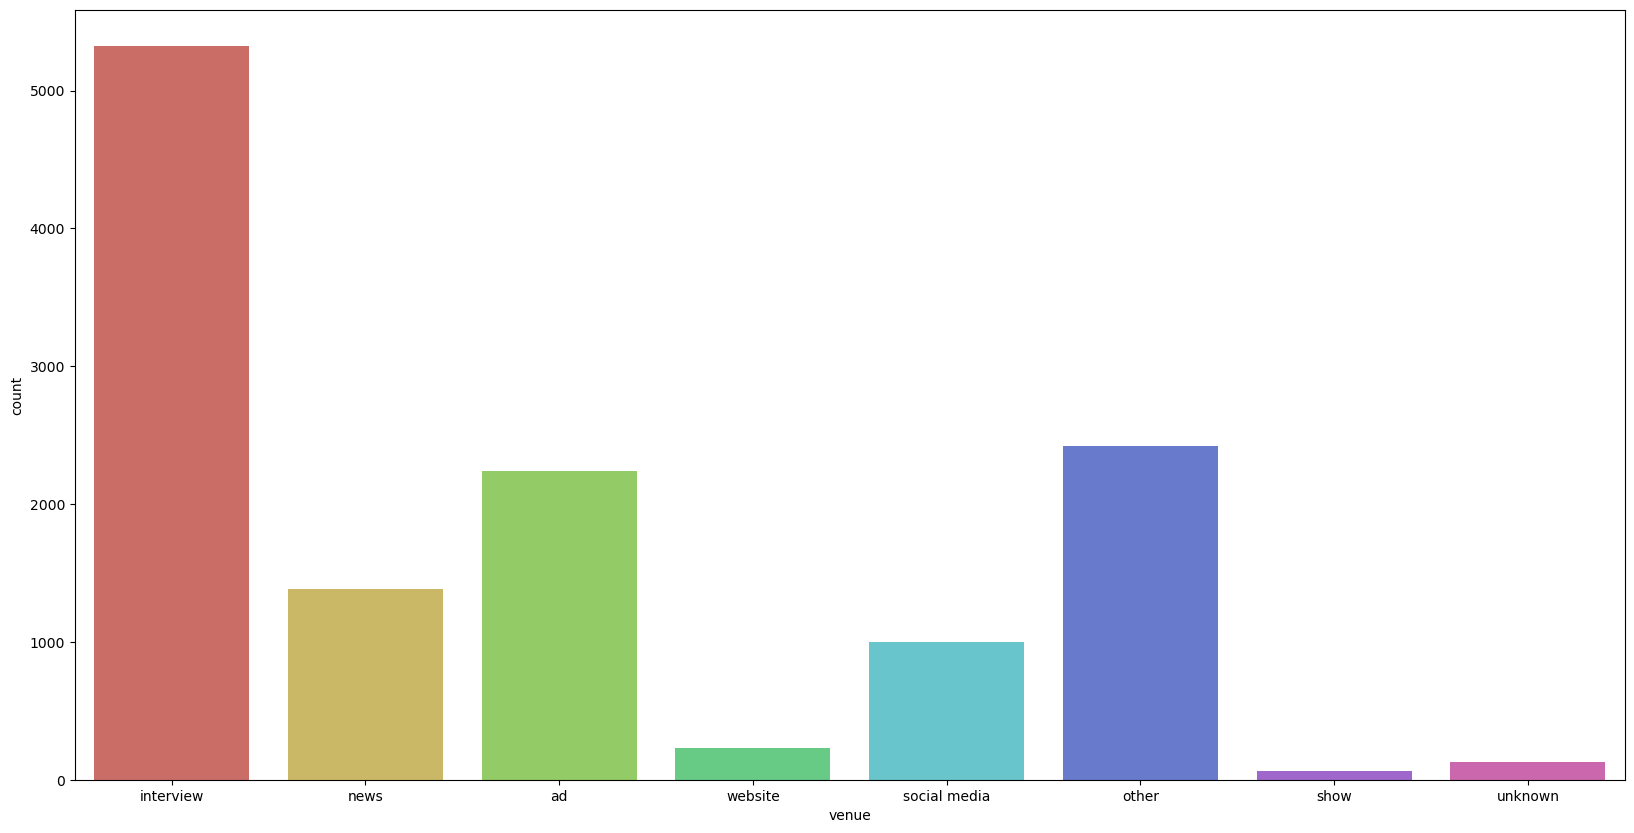

In [102]:
# Count of the venue now !
def check_dist(dataset):
    sns.countplot(x='venue', data=df, palette='hls')
check_dist(df)

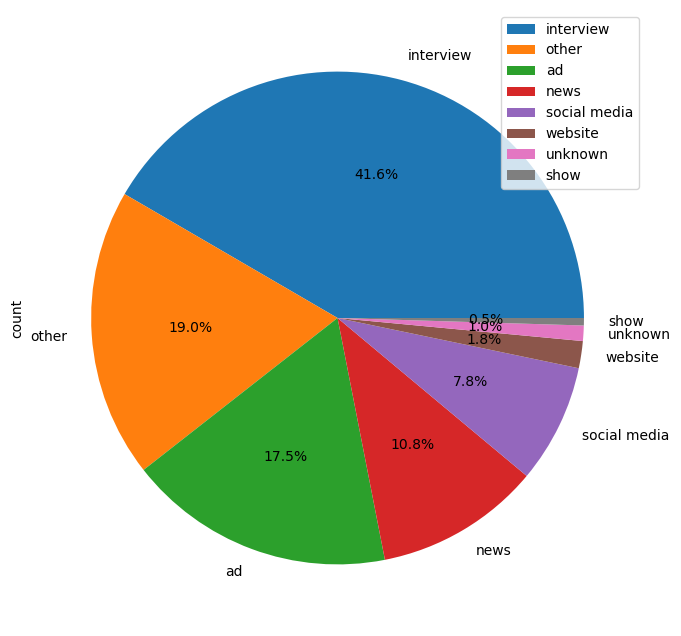

In [103]:
df["venue"].value_counts().head(12).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend()

### 8. Preparing the Numeric data

In [104]:
# Numeric data type columns
num=df[['barely true counts', 'false counts',
       'half true counts', 'mostly true counts', 'pants on fire counts']]
num=num.fillna(0)
num.head()

,barely true counts,false counts,half true counts,mostly true counts,pants on fire counts
0,30.0,30.0,42.0,23.0,18.0
1,2.0,1.0,0.0,0.0,0.0
2,63.0,114.0,51.0,37.0,61.0
3,1.0,1.0,3.0,1.0,1.0
4,5.0,7.0,2.0,2.0,7.0


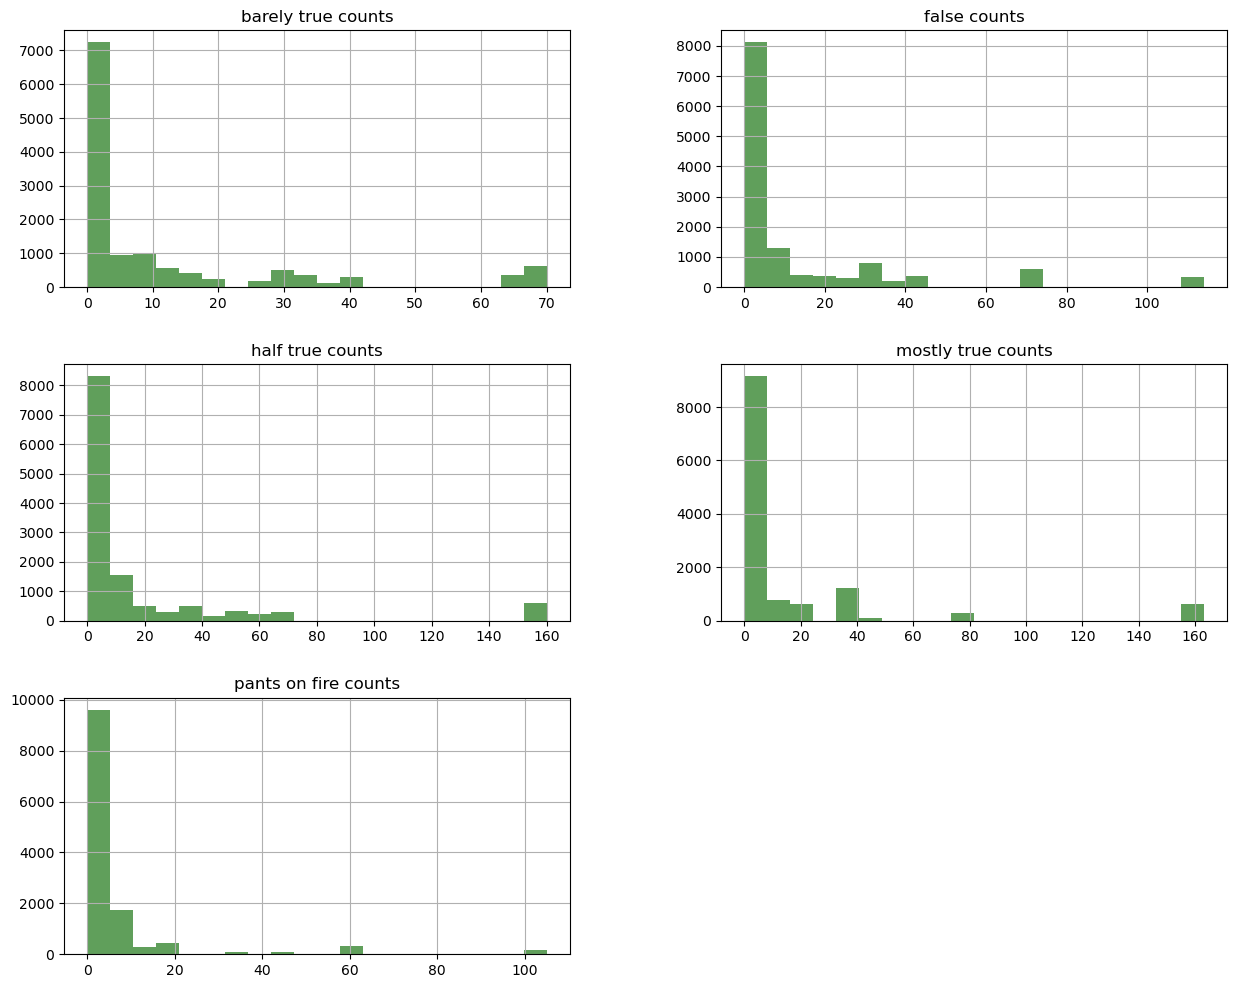

In [105]:
# Visualization of the columns
num.hist(figsize=(15,12),bins = 20, color="#107009AA")
plt.title("Features Distribution")
plt.show()

### Features extraction from the "Statement of the news"

In [106]:
from sklearn.feature_extraction.text import TfidfVectorizer

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    ngram_range=(3, 3),
    max_features =5000)

Get_Vec= word_vectorizer.fit_transform(df['statement'].astype('str'))
Get_Vec= Get_Vec.toarray()

vocab1 = word_vectorizer.get_feature_names_out()
Features_vect=pd.DataFrame(np.round(Get_Vec, 1), columns=vocab1)
Features_vect.head()

,a bond rating,a clarke jr,a credit rating,able buy gun,abolish second amendment,abolishing social security,abortion demand moment,abortion even cases,abortion ilegal even,abortions even cases,...,years texas created,years united states,york city mayor,york mayor michael,york senator clinton,young ilegal imigrants,youre les likely,youre likely stay,youth unemployment percent,zero job creation
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [107]:
# Deleting the statement because we have extracted 5000 features from this
df=df.drop(columns=['statement'])

### Encodings of venue, speaker's job title, party affiliation, subject

##

In [108]:
cleanup_nums = {"venue":     {'interview': 0, 'ad': 1, 'social media': 2,'news': 3, 'website': 4, 'show': 5, 'unknown': -1 , 'other' : 6},
                "speaker's job title": {'state representative': 0, 'president': 1, 'office director': 2, 'company': 3,
                                  'U.S. representative': 4, 'government': 5, 'media':6, 'unknown': -1, 'other' : 7 },
                "party affiliation":     {'republican': 0, 'democrat': 1, 'Unknown': -1,'Other': 2},
                "subject(s)": {'jobs':0, 'military':1, 'education':2, 'economy':3, 'government':4, 'health-care':5,
                               'crime':6, 'environment':7, 'budget':8, 'politics':9,'social':10, 'other':11}
              }

df.replace(cleanup_nums, inplace=True)
df.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_10228\3067490171.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(cleanup_nums, inplace=True)


,label,subject(s),speaker,speaker's job title,state info,party affiliation,barely true counts,false counts,half true counts,mostly true counts,pants on fire counts,venue
0,TRUE,10,rick-perry,0,Texas,0.0,30.0,30.0,42.0,23.0,18.0,0
1,FALSE,0,katrina-shankland,4,Wisconsin,1.0,2.0,1.0,0.0,0.0,0.0,0
2,FALSE,1,donald-trump,1,New York,0.0,63.0,114.0,51.0,37.0,61.0,3
3,half-true,5,rob-cornilles,7,Oregon,0.0,1.0,1.0,3.0,1.0,1.0,1
4,pants-fire,6,state-democratic-party-wisconsin,-1,Wisconsin,1.0,5.0,7.0,2.0,2.0,7.0,4


In [109]:
# Addind Statement features with the other columns
df = pd.concat([df, Features_vect], axis=1)

### Encodings of label, speaker, state info

In [110]:
x = pd.Categorical(df['speaker'])
df['speaker']=x.codes
x = pd.Categorical(df['label'])
df['label']=x.codes
x = pd.Categorical(df['state info'])
df['state info']=x.codes

In [111]:
df.head()

,label,subject(s),speaker,speaker's job title,state info,party affiliation,barely true counts,false counts,half true counts,mostly true counts,...,years texas created,years united states,york city mayor,york mayor michael,york senator clinton,young ilegal imigrants,youre les likely,youre likely stay,youth unemployment percent,zero job creation
0,1,10,2545,0,62,0.0,30.0,30.0,42.0,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,1696,4,79,1.0,2.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,841,1,42,0.0,63.0,114.0,51.0,37.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,5,2556,7,48,0.0,1.0,1.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,6,2791,-1,79,1.0,5.0,7.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Labels Visualization

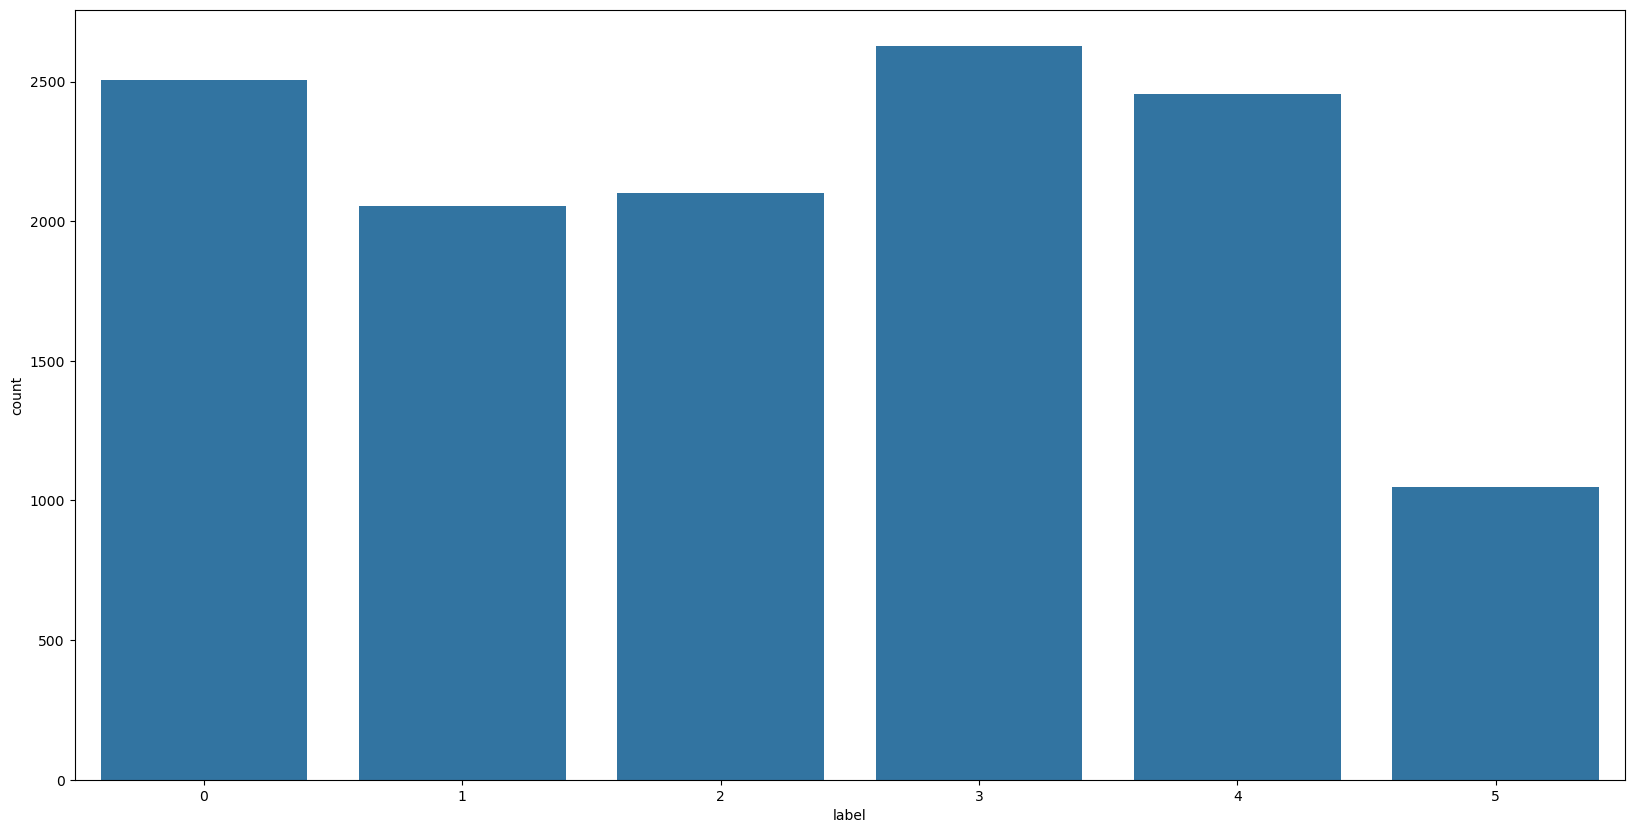

In [112]:
df=df[df['label']!=-1]
y = df.label
sns.countplot(data= df, x = y)
plt.show()

In [ ]:
cd = df.to_csv(r"C:\\Users\\hp\\OneDrive\Desktop\DSA\\Jupyter\DM_Project\\cleaned_df.csv", index=False)

## KFold Cross Validation

### K fold cross validation and splitting the data five times

In [134]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)
i=0
for train, test in kf.split(df):
    i=i+1
    print("KFold Split ",i )
    print("%s %s" % (train, test))
    print(' \n')

KFold Split  1
[ 2558  2559  2560 ... 12783 12784 12785] [   0    1    2 ... 2555 2556 2557]
 

KFold Split  2
[    0     1     2 ... 12783 12784 12785] [2558 2559 2560 ... 5112 5113 5114]
 

KFold Split  3
[    0     1     2 ... 12783 12784 12785] [5115 5116 5117 ... 7669 7670 7671]
 

KFold Split  4
[    0     1     2 ... 12783 12784 12785] [ 7672  7673  7674 ... 10226 10227 10228]
 

KFold Split  5
[    0     1     2 ... 10226 10227 10228] [10229 10230 10231 ... 12783 12784 12785]
 



# ------------------------------------------------------------------------------------------------

## Machine Learning Modelling

### Random Forest Machine Algorithm

KFold Split: 1
Train indices: [ 2558  2559  2560 ... 12783 12784 12785]
Test indices: [   0    1    2 ... 2555 2556 2557]

Running time of algorithm
CPU times: total: 48.9 s
Wall time: 52.9 s
Accuracy of KFold 1 is: 0.9268960125097733

Classification Report of KFold 1 is following:

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       515
           1       0.90      0.87      0.89       414
           2       0.86      0.90      0.88       401
           3       0.94      0.95      0.94       531
           4       0.93      0.96      0.95       500
           5       0.95      0.79      0.86       197

    accuracy                           0.93      2558
   macro avg       0.93      0.91      0.92      2558
weighted avg       0.93      0.93      0.93      2558

Confusion Matrix of KFold 1 is following:

[[512   3   0   0   0   0]
 [ 11 360  36   5   0   2]
 [  3  31 360   7   0   0]
 [  0   5  17 502   7   0]
 [  0   0   1  11 481 

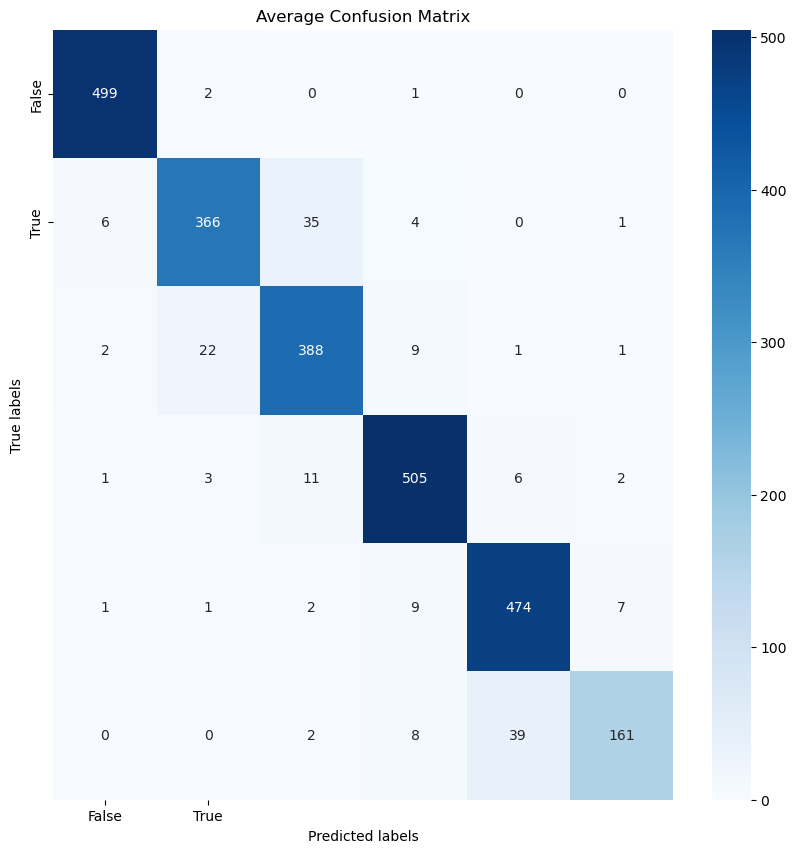

Total Average Accuracy of Random Forest Classifier is : 0.9348512400459515


In [115]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

X = df.iloc[:, :-1].values
y = df['label'].values  # Convert to NumPy array

kf = KFold(n_splits=5)
outcomes1 = []
conf_matrix_list_of_arrays = []

rf = RandomForestClassifier(min_samples_leaf=1, min_samples_split=2)
fold = 0
i = 0

for train_index, test_index in kf.split(X):
    i += 1
    print(f"KFold Split: {i}")
    print(f"Train indices: {train_index}")
    print(f"Test indices: {test_index}\n")

    Xtrain, Xtest = X[train_index], X[test_index]
    ytrain, ytest = y[train_index], y[test_index]

    print('Running time of algorithm')
    %time rf.fit(Xtrain, ytrain)

    predictions = rf.predict(Xtest)
    accuracy = accuracy_score(ytest, predictions)
    outcomes1.append(accuracy)
    print(f"Accuracy of KFold {i} is: {accuracy}\n")

    print(f"Classification Report of KFold {i} is following:\n")
    CR = classification_report(ytest, predictions)
    print(CR)

    print(f"Confusion Matrix of KFold {i} is following:\n")
    CM = confusion_matrix(ytest, predictions)
    conf_matrix_list_of_arrays.append(CM)
    print(CM)
    print('\n')

print('\nAverage Confusion Matrix')
aa = np.mean(conf_matrix_list_of_arrays, axis=0)
aaa = np.ceil(aa).astype(int)

# Define your labels according to the confusion matrix size
labels = ['False', 'True']

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(aaa, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Average Confusion Matrix')
plt.show()

mean_outcome1 = np.mean(outcomes1)
print(f"Total Average Accuracy of Random Forest Classifier is : {mean_outcome1}")

### Naive Bias Machine Learning Algorithm

KFold Split: 1
Train indices: [ 2558  2559  2560 ... 12783 12784 12785]
Test indices: [   0    1    2 ... 2555 2556 2557]

Running time of algorithm
CPU times: total: 1.28 s
Wall time: 2.56 s
Accuracy of KFold 1 is: 0.9988272087568413

Classification Report of KFold 1 is following:

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       515
           1       1.00      0.99      1.00       414
           2       1.00      1.00      1.00       401
           3       1.00      1.00      1.00       531
           4       1.00      1.00      1.00       500
           5       1.00      1.00      1.00       197

    accuracy                           1.00      2558
   macro avg       1.00      1.00      1.00      2558
weighted avg       1.00      1.00      1.00      2558

Confusion Matrix of KFold 1 is following:

[[515   0   0   0   0   0]
 [  3 411   0   0   0   0]
 [  0   0 401   0   0   0]
 [  0   0   0 531   0   0]
 [  0   0   0   0 500 

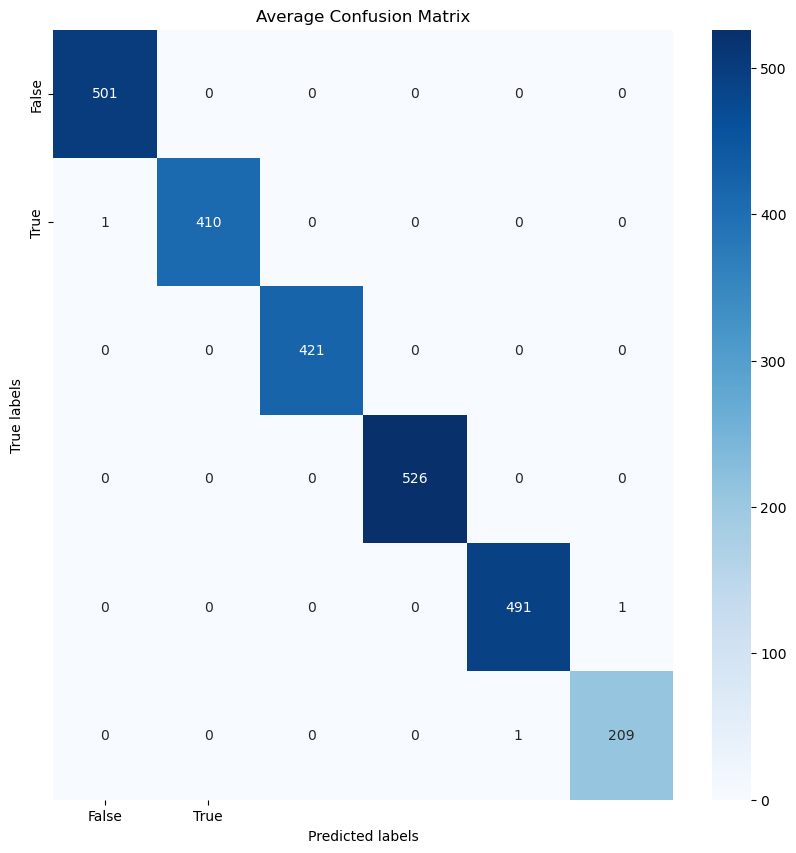

Total Average Accuracy of Naive Bayes is: 0.998983275149882


In [116]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure `df` is defined, and `y` is a NumPy array
X = df.iloc[:, :-1].values
y = df['label'].values  # Convert to NumPy array

kf = KFold(n_splits=5)
outcomes2 = []
conf_matrix_list_of_arrays = []

nb = GaussianNB(var_smoothing=1e-08)
fold = 0
i = 0

for train_index, test_index in kf.split(X):
    i += 1
    print(f"KFold Split: {i}")
    print(f"Train indices: {train_index}")
    print(f"Test indices: {test_index}\n")

    Xtrain, Xtest = X[train_index], X[test_index]
    ytrain, ytest = y[train_index], y[test_index]

    print('Running time of algorithm')
    %time nb.fit(Xtrain, ytrain)

    predictions = nb.predict(Xtest)
    accuracy = accuracy_score(ytest, predictions)
    outcomes2.append(accuracy)
    print(f"Accuracy of KFold {i} is: {accuracy}\n")

    print(f"Classification Report of KFold {i} is following:\n")
    CR = classification_report(ytest, predictions)
    print(CR)

    print(f"Confusion Matrix of KFold {i} is following:\n")
    CM = confusion_matrix(ytest, predictions)
    conf_matrix_list_of_arrays.append(CM)
    print(CM)
    print('\n')

print('\nAverage Confusion Matrix')
aa = np.mean(conf_matrix_list_of_arrays, axis=0)
aaa = np.ceil(aa).astype(int)

# Define your labels according to the confusion matrix size
labels = ['False', 'True']  # Update labels based on your actual classes

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(aaa, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Average Confusion Matrix')
plt.show()

mean_outcome2 = np.mean(outcomes2)
print(f"Total Average Accuracy of Naive Bayes is: {mean_outcome2}")

### Decision Trees Machine Learning Algorithm

Class distribution:
{0: 2504, 1: 2053, 2: 2102, 3: 2626, 4: 2454, 5: 1047}

KFold Split: 1
Train indices: [    0     2     3 ... 12783 12784 12785]
Test indices: [    1     9    23 ... 12757 12772 12782]

Running time of algorithm
CPU times: total: 2.81 s
Wall time: 3 s
Accuracy of KFold 1 is: 0.918295543393276

Classification Report of KFold 1 is following:



c:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       501
           1       1.00      1.00      1.00       411
           2       1.00      1.00      1.00       421
           3       1.00      1.00      1.00       525
           4       0.70      1.00      0.82       491
           5       0.00      0.00      0.00       209

    accuracy                           0.92      2558
   macro avg       0.78      0.83      0.80      2558
weighted avg       0.86      0.92      0.88      2558

Confusion Matrix of KFold 1 is following:

[[501   0   0   0   0   0]
 [  0 411   0   0   0   0]
 [  0   0 421   0   0   0]
 [  0   0   0 525   0   0]
 [  0   0   0   0 491   0]
 [  0   0   0   0 209   0]]


KFold Split: 2
Train indices: [    1     2     3 ... 12783 12784 12785]
Test indices: [    0     4     8 ... 12776 12778 12781]

Running time of algorithm
CPU times: total: 2.92 s
Wall time: 3.08 s
Accuracy of KFold 2 is: 0.9182635901447008

Classif

c:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Running time of algorithm
CPU times: total: 2.8 s
Wall time: 2.98 s
Accuracy of KFold 3 is: 0.9182635901447008

Classification Report of KFold 3 is following:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       1.00      1.00      1.00       411
           2       1.00      1.00      1.00       420
           3       1.00      1.00      1.00       526
           4       0.70      1.00      0.82       491
           5       0.00      0.00      0.00       209

    accuracy                           0.92      2557
   macro avg       0.78      0.83      0.80      2557
weighted avg       0.86      0.92      0.88      2557

Confusion Matrix of KFold 3 is following:

[[500   0   0   0   0   0]
 [  0 411   0   0   0   0]
 [  0   0 420   0   0   0]
 [  0   0   0 526   0   0]
 [  0   0   0   0 491   0]
 [  0   0   0   0 209   0]]


KFold Split: 4
Train indices: [    0     1     3 ... 12783 12784 12785]
Test indices: [  

c:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Running time of algorithm
CPU times: total: 2.77 s
Wall time: 2.88 s
Accuracy of KFold 4 is: 0.9178725068439577

Classification Report of KFold 4 is following:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       501
           1       1.00      1.00      1.00       410
           2       1.00      1.00      1.00       420
           3       1.00      1.00      1.00       525
           4       0.70      1.00      0.82       491
           5       0.00      0.00      0.00       210

    accuracy                           0.92      2557
   macro avg       0.78      0.83      0.80      2557
weighted avg       0.86      0.92      0.88      2557

Confusion Matrix of KFold 4 is following:

[[501   0   0   0   0   0]
 [  0 410   0   0   0   0]
 [  0   0 420   0   0   0]
 [  0   0   0 525   0   0]
 [  0   0   0   0 491   0]
 [  0   0   0   0 210   0]]


KFold Split: 5
Train indices: [    0     1     2 ... 12782 12783 12785]
Test indices: [ 

c:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Running time of algorithm
CPU times: total: 3 s
Wall time: 3.68 s
Accuracy of KFold 5 is: 0.9178725068439577

Classification Report of KFold 5 is following:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       501
           1       1.00      1.00      1.00       410
           2       1.00      1.00      1.00       420
           3       1.00      1.00      1.00       525
           4       0.70      1.00      0.82       491
           5       0.00      0.00      0.00       210

    accuracy                           0.92      2557
   macro avg       0.78      0.83      0.80      2557
weighted avg       0.86      0.92      0.88      2557

Confusion Matrix of KFold 5 is following:

[[501   0   0   0   0   0]
 [  0 410   0   0   0   0]
 [  0   0 420   0   0   0]
 [  0   0   0 525   0   0]
 [  0   0   0   0 491   0]
 [  0   0   0   0 210   0]]


Average Confusion Matrix


c:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


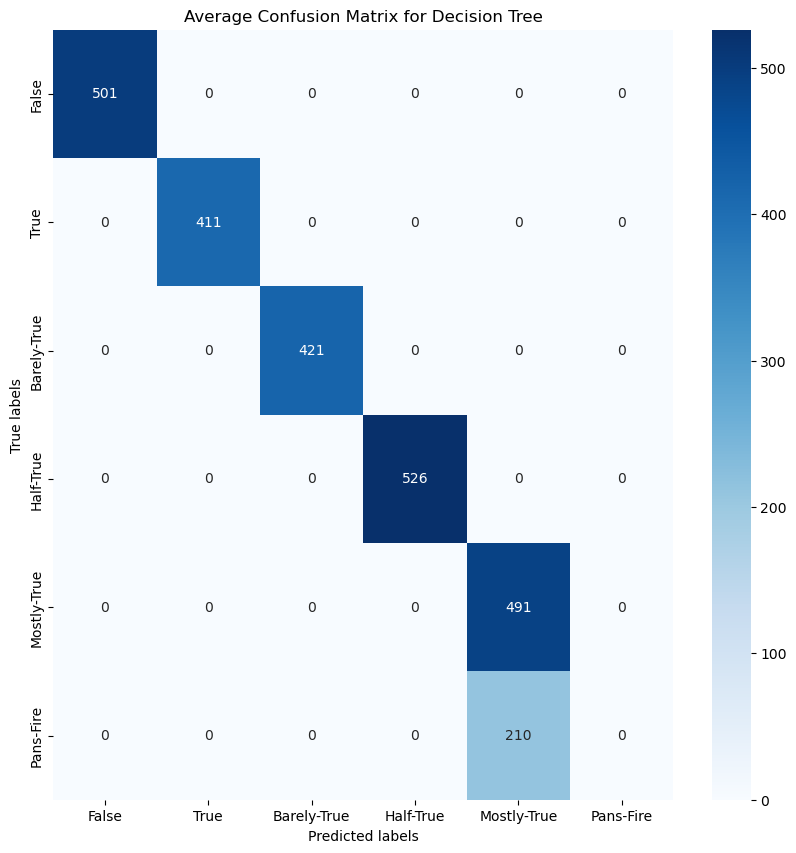

Total Average Accuracy of Decision Trees is: 0.9181135474741187


In [117]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and it contains the feature columns and the 'label' column
X = df.iloc[:, :-1].values
y = df['label'].values  # Convert to NumPy array

# Check class distribution
unique, counts = np.unique(y, return_counts=True)
print(f"Class distribution:\n{dict(zip(unique, counts))}\n")

# Stratified K-Folds to maintain class distribution
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
outcomes3 = []
conf_matrix_list_of_arrays = []
i = 0

# Decision Tree Classifier with specified parameters
dt = DecisionTreeClassifier(min_samples_leaf=900, random_state=42)

for train_index, test_index in skf.split(X, y):
    i += 1
    print(f"KFold Split: {i}")
    print(f"Train indices: {train_index}")
    print(f"Test indices: {test_index}\n")

    Xtrain, Xtest = X[train_index], X[test_index]
    ytrain, ytest = y[train_index], y[test_index]

    print('Running time of algorithm')
    %time dt.fit(Xtrain, ytrain)

    predictions = dt.predict(Xtest)
    accuracy = accuracy_score(ytest, predictions)
    outcomes3.append(accuracy)
    print(f"Accuracy of KFold {i} is: {accuracy}\n")

    print(f"Classification Report of KFold {i} is following:\n")
    CR = classification_report(ytest, predictions)
    print(CR)

    print(f"Confusion Matrix of KFold {i} is following:\n")
    CM = confusion_matrix(ytest, predictions)
    conf_matrix_list_of_arrays.append(CM)
    print(CM)
    print('\n')

# Calculate average confusion matrix
print('Average Confusion Matrix')
average_conf_matrix = np.mean(conf_matrix_list_of_arrays, axis=0)
average_conf_matrix_ceil = np.ceil(average_conf_matrix).astype(int)

# Define your labels according to the confusion matrix size
labels = ['False', 'True', 'Barely-True', 'Half-True', 'Mostly-True', 'Pans-Fire']

# Create a heatmap for the average confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(average_conf_matrix_ceil, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Average Confusion Matrix for Decision Tree')
plt.show()

mean_outcomes3 = np.mean(outcomes3)
print(f"Total Average Accuracy of Decision Trees is: {mean_outcomes3}")


### Comparison of all algorithms Results

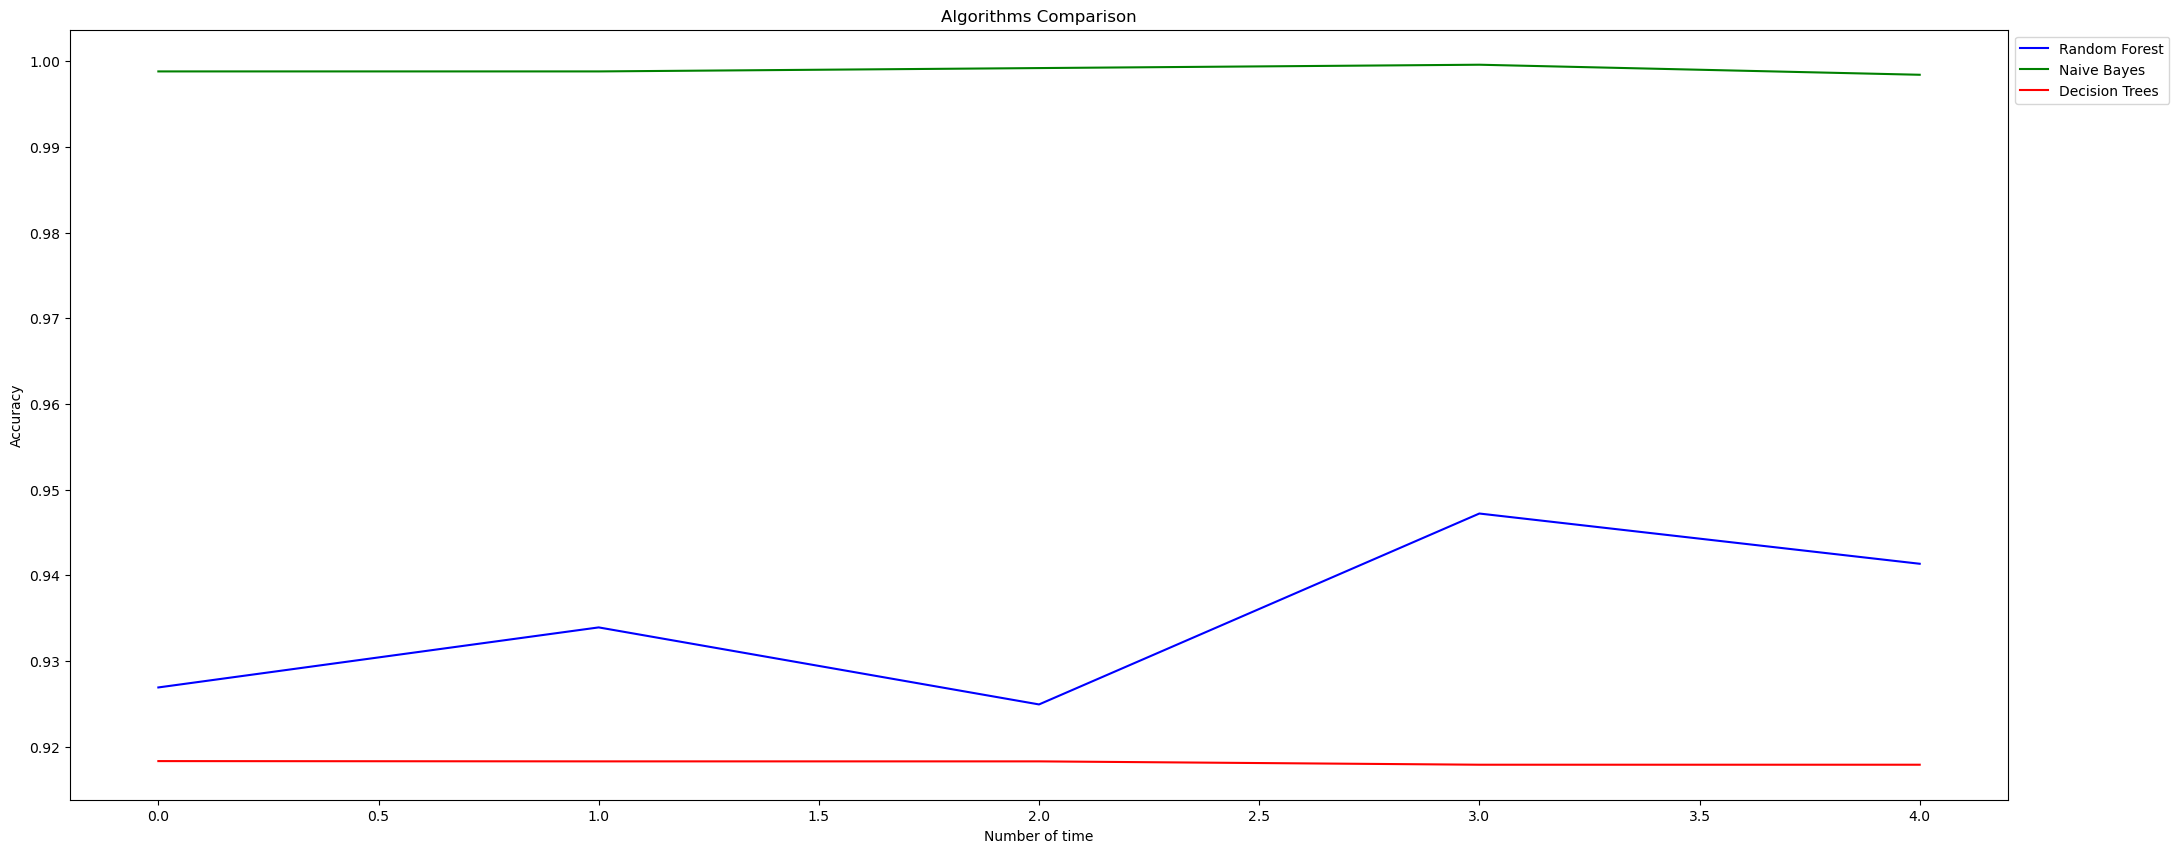

In [118]:
a=pd.DataFrame()
a['outcomes1']=outcomes1
a['outcomes2']=outcomes2
a['outcomes3']=outcomes3

plt.figure(figsize=(25, 10))
plt.subplot(1,1,1)
plt.plot(a.outcomes1.values,color='blue',label='Random Forest')
plt.plot(a.outcomes2.values,color='green',label='Naive Bayes')
plt.plot(a.outcomes3.values,color='red',label='Decision Trees')
plt.title('Algorithms Comparison')
plt.xlabel('Number of time')
plt.ylabel('Accuracy')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

In [119]:
a=a.rename(columns={'outcomes1':'Random Forest', 'outcomes2':'Naive Bayes','outcomes3':'Decision Trees'})

<Axes: >

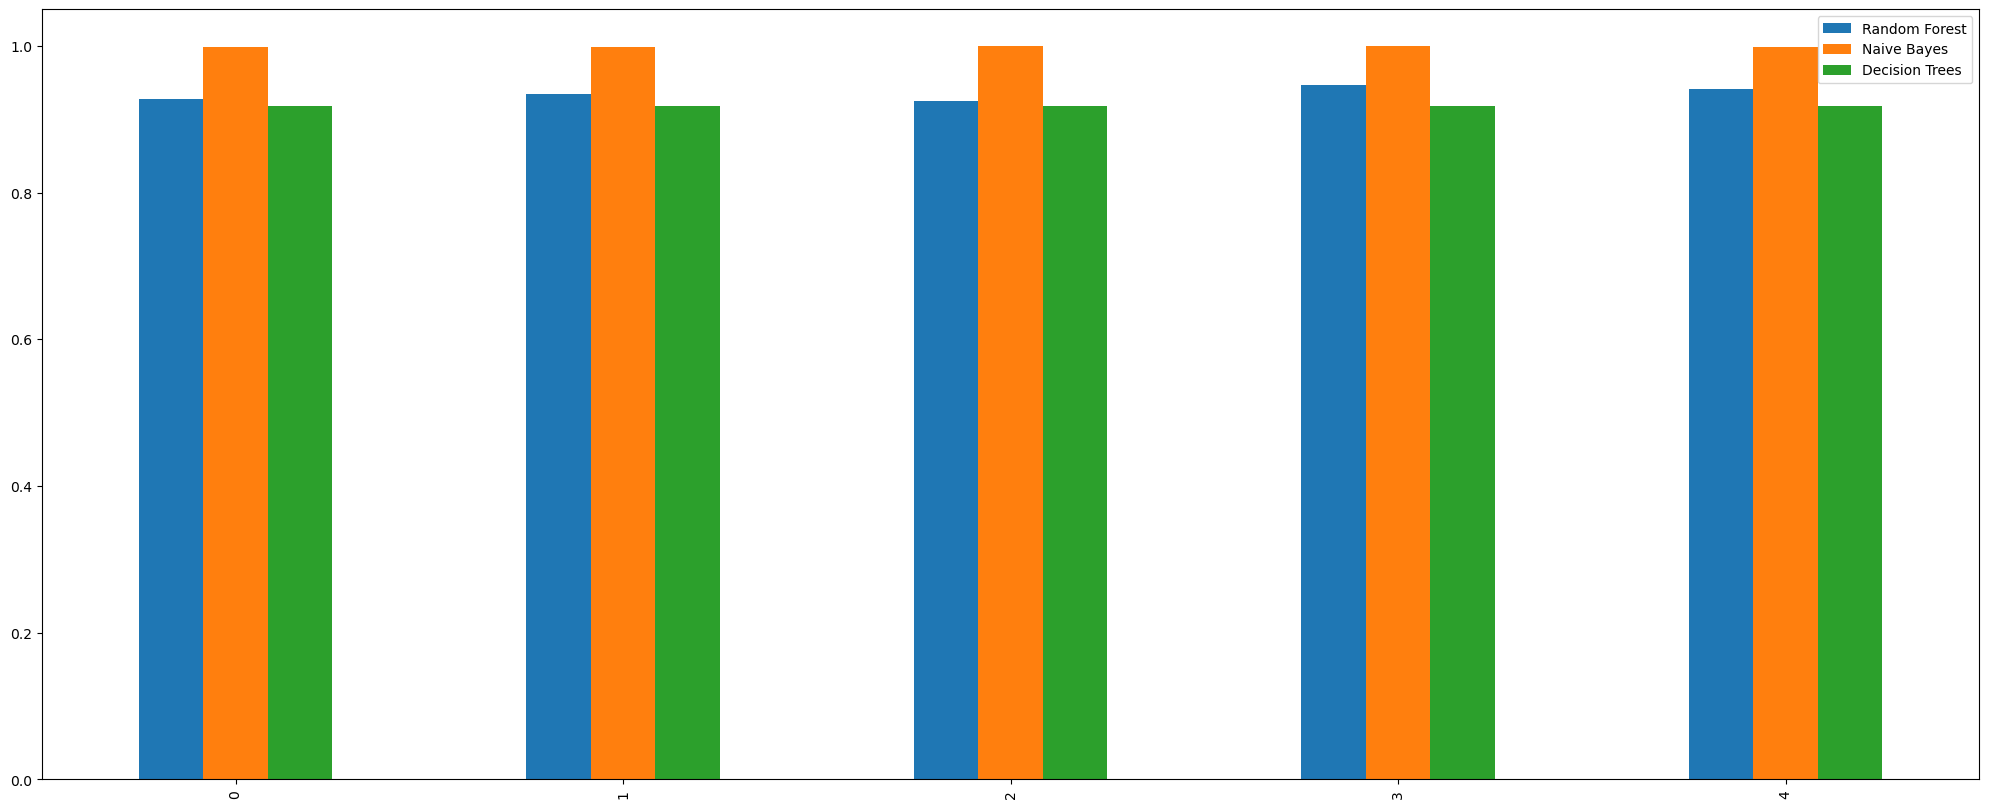

In [120]:
a.plot(kind='bar',figsize=(25, 10))

In [121]:
a

,Random Forest,Naive Bayes,Decision Trees
0,0.926896,0.998827,0.918296
1,0.933907,0.998827,0.918264
2,0.924912,0.999218,0.918264
3,0.947204,0.999609,0.917873
4,0.941338,0.998436,0.917873


In [122]:
pip install prettytable

Note: you may need to restart the kernel to use updated packages.


In [123]:
from prettytable import PrettyTable

x = PrettyTable()
print('\n')
print("Best Model.")
x.field_names = ["Model", "Accuracy"]
x.add_row(["Naive Bayes Algorithm",a['Naive Bayes']])
print(x)
print('\n')



Best Model.
+-----------------------+-----------------------------------+
|         Model         |              Accuracy             |
+-----------------------+-----------------------------------+
| Naive Bayes Algorithm |           0    0.998827           |
|                       |           1    0.998827           |
|                       |           2    0.999218           |
|                       |           3    0.999609           |
|                       |           4    0.998436           |
|                       | Name: Naive Bayes, dtype: float64 |
+-----------------------+-----------------------------------+


